SOIL DATA ANALYSIS - HWSD2 LAYER D1
BIL File: /run/media/swift/MISO_EFI/DATA/SOIL/HWSD2_RASTER/HWSD2.bil
CSV File: /run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv
Output File: /run/media/swift/MISO_EFI/DATA/SOIL/processed/layer_1_final.csv

📊 LOADING TABULAR DATA...


/tmp/ipykernel_920911/1386412687.py:40: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_d1 = pd.read_csv(CSV_PATH)


✓ CSV file loaded: (58405, 48)

✅ Tabular data saved to '/run/media/swift/MISO_EFI/DATA/SOIL/processed/layer_1_final.csv'
   Shape: 58,405 rows × 29 columns

🌍 LOADING RASTER DATA...
✓ Raster loaded successfully!
  Number of bands: 1
  Raster shape: 21600 x 43200 pixels
  Resolution: 0.008333 x 0.008333 degrees
  Bounds:
    Left: -180.0000
    Bottom: -90.0000
    Right: 180.0000
    Top: 90.0000
  Extent: 360.00° x 180.00°
  CRS: OGC:CRS84
  Data type: uint16
  Memory: 1779.79 MB

📈 Raster Statistics (first 3 bands):
  Band 1:
    Valid pixels: 933,120,000
    Min: 2.00
    Max: 65535.00
    Mean: 52218.80
    Std: 24098.13

DATASET SUMMARY

📊 TABULAR DATA (HWSD2 Layer D1):
  Records: 58,405
  Features: 29
  ID columns: 4
  Physical properties: 8
  Chemical properties: 14

🌍 SPATIAL DATA (HWSD Raster):
  Dimensions: 21600 x 43200 pixels
  Total pixels: 933,120,000
  Spatial extent: 360.00° x 180.00°
  Pixel size: 0.008333° x 0.008333°

🔗 DATA LINKING POTENTIAL:
  Linking column: HWSD

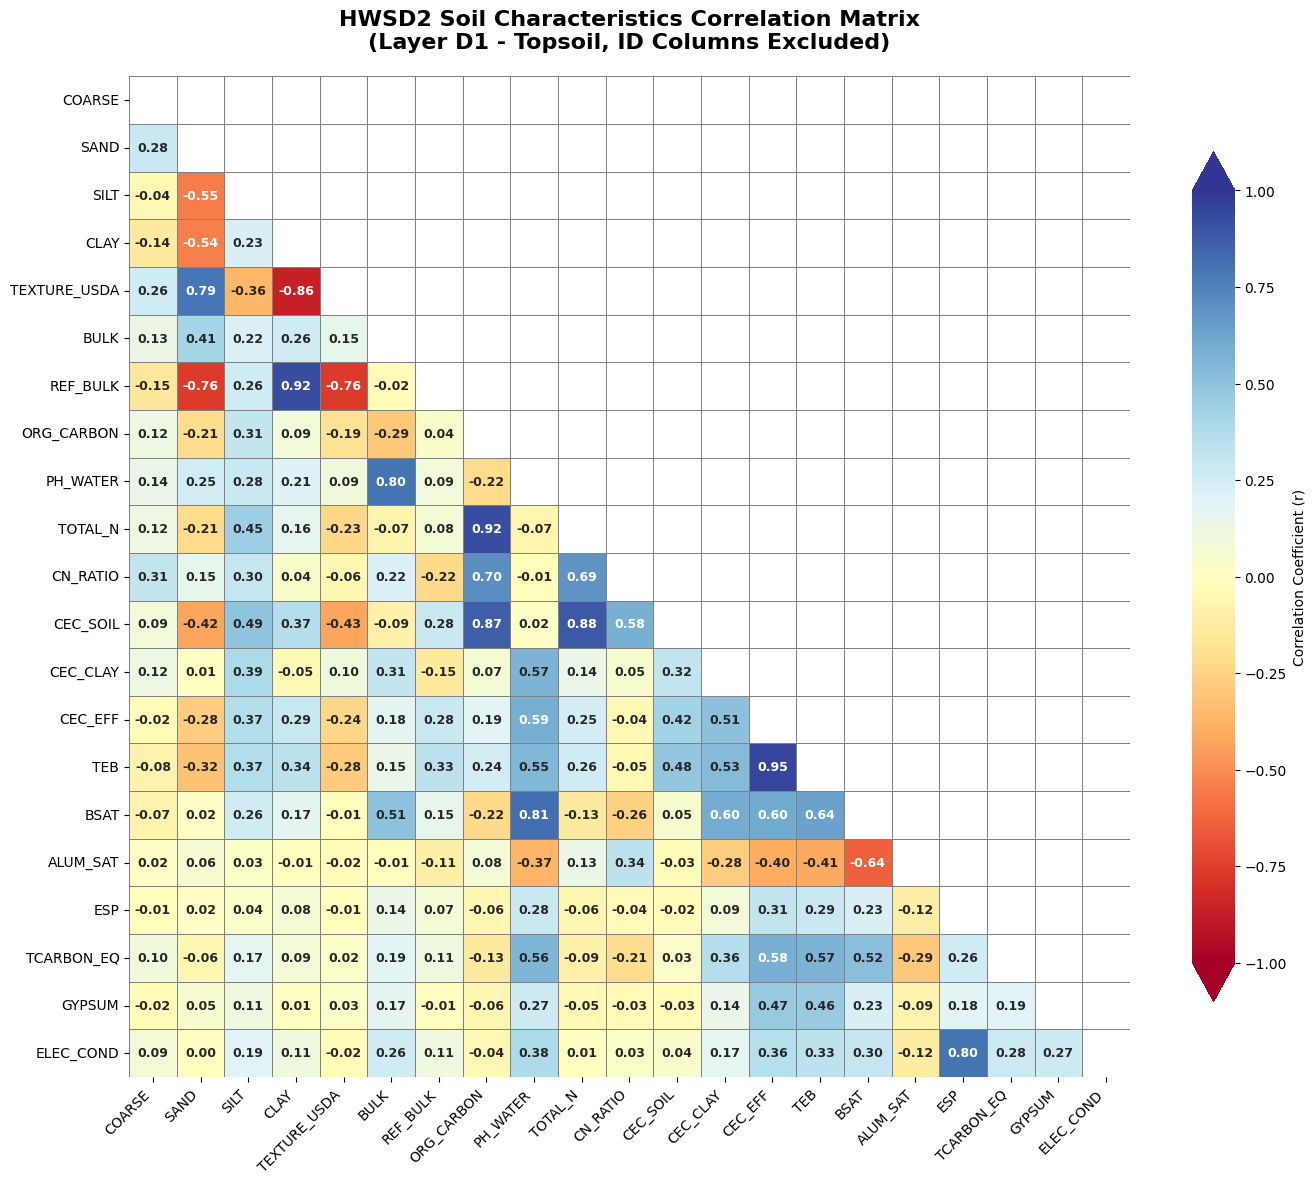


----------------------------------------
CLUSTERED CORRELATION MATRIX - SOIL CHARACTERISTICS
----------------------------------------


RuntimeError: clustermap requires scipy to be available

In [3]:
# ============================================================================
# SOIL DATA ANALYSIS PIPELINE
# HWSD2 Layer 1 (D1) Analysis with Raster Integration
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# ============================================================================
# 1. PATHS CONFIGURATION
# ============================================================================
# Define all paths
HWSD_BIL = Path("/run/media/swift/MISO_EFI/DATA/SOIL/HWSD2_RASTER/HWSD2.bil")
CSV_PATH = Path("/run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv")
OUTPUT_DIR = Path("/run/media/swift/MISO_EFI/DATA/SOIL/processed")
OUTPUT_PATH = OUTPUT_DIR / "layer_1_final.csv"

print("="*60)
print("SOIL DATA ANALYSIS - HWSD2 LAYER D1")
print("="*60)
print(f"BIL File: {HWSD_BIL}")
print(f"CSV File: {CSV_PATH}")
print(f"Output File: {OUTPUT_PATH}")
print("="*60)

# ============================================================================
# 2. LOAD AND PREPARE TABULAR DATA
# ============================================================================
print("\n📊 LOADING TABULAR DATA...")

try:
    # Load the CSV file
    if not CSV_PATH.exists():
        raise FileNotFoundError(f"CSV file not found at {CSV_PATH}")
    
    df_d1 = pd.read_csv(CSV_PATH)
    print(f'✓ CSV file loaded: {df_d1.shape}')
    
    # Define columns to keep
    id_columns = ["ID", "HWSD2_SMU_ID", "WISE30s_SMU_ID", "HWSD1_SMU_ID", 
                  "COVERAGE", "SEQUENCE", "SHARE"]
    
    soil_characteristics = ["COARSE", "SAND", "SILT", "CLAY", "TEXTURE_USDA", "TEXTURE_SOTER", 
                            "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER", "TOTAL_N", "CN_RATIO", 
                            "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB", "BSAT", "ALUM_SAT", 
                            "ESP", "TCARBON_EQ", "GYPSUM", "ELEC_COND"]
    
    # Filter to available columns only
    available_columns = [col for col in (id_columns + soil_characteristics) 
                         if col in df_d1.columns]
    
    # Create final dataframe
    df_soil = df_d1[available_columns]
    
    # Save to CSV
    OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
    df_soil.to_csv(OUTPUT_PATH, index=False)
    
    print(f"\n✅ Tabular data saved to '{OUTPUT_PATH}'")
    print(f"   Shape: {df_soil.shape[0]:,} rows × {df_soil.shape[1]} columns")
    
except FileNotFoundError as e:
    print(f"❌ ERROR: {e}")
    exit()
except Exception as e:
    print(f"❌ ERROR loading CSV: {type(e).__name__}: {e}")
    exit()

# ============================================================================
# 3. LOAD RASTER DATA
# ============================================================================
print("\n🌍 LOADING RASTER DATA...")

try:
    import rasterio as rio
    from rasterio.plot import show
    
    if not HWSD_BIL.exists():
        print(f"⚠ BIL file not found at {HWSD_BIL}")
        print("   Skipping raster loading...")
        raster_data = None
        raster_profile = None
        raster_bounds = None
        raster_crs = None
    else:
        with rio.open(str(HWSD_BIL)) as src:
            # Read raster data
            raster_data = src.read()  # Read all bands
            raster_profile = src.profile
            raster_bounds = src.bounds
            raster_crs = src.crs
            
            # Calculate width and height from bounds
            raster_width = raster_bounds.right - raster_bounds.left
            raster_height = raster_bounds.top - raster_bounds.bottom
            
            print('✓ Raster loaded successfully!')
            print(f'  Number of bands: {raster_data.shape[0]}')
            print(f'  Raster shape: {raster_data.shape[1]} x {raster_data.shape[2]} pixels')
            print(f'  Resolution: {src.res[0]:.6f} x {src.res[1]:.6f} degrees')
            print(f'  Bounds:')
            print(f'    Left: {raster_bounds.left:.4f}')
            print(f'    Bottom: {raster_bounds.bottom:.4f}')
            print(f'    Right: {raster_bounds.right:.4f}')
            print(f'    Top: {raster_bounds.top:.4f}')
            print(f'  Extent: {raster_width:.2f}° x {raster_height:.2f}°')
            print(f'  CRS: {raster_crs}')
            print(f'  Data type: {raster_data.dtype}')
            print(f'  Memory: {raster_data.nbytes / (1024**2):.2f} MB')
            
            # Show raster preview
            print("\n📈 Raster Statistics (first 3 bands):")
            for i in range(min(3, raster_data.shape[0])):
                band_data = raster_data[i]
                valid_data = band_data[~np.isnan(band_data)]
                if len(valid_data) > 0:
                    print(f'  Band {i+1}:')
                    print(f'    Valid pixels: {len(valid_data):,}')
                    print(f'    Min: {valid_data.min():.2f}')
                    print(f'    Max: {valid_data.max():.2f}')
                    print(f'    Mean: {valid_data.mean():.2f}')
                    print(f'    Std: {valid_data.std():.2f}')
            
except ImportError:
    print("⚠ rasterio not installed. Install with: pip install rasterio")
    raster_data = None
    raster_profile = None
    raster_bounds = None
    raster_crs = None
except Exception as e:
    print(f'❌ Error loading raster: {type(e).__name__}: {e}')
    raster_data = None
    raster_profile = None
    raster_bounds = None
    raster_crs = None

# ============================================================================
# 4. DATASET CONTENT SUMMARY
# ============================================================================
print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)

print(f"\n📊 TABULAR DATA (HWSD2 Layer D1):")
print(f"  Records: {df_soil.shape[0]:,}")
print(f"  Features: {df_soil.shape[1]}")
print(f"  ID columns: {sum(1 for col in df_soil.columns if 'ID' in col.upper())}")
print(f"  Physical properties: {sum(1 for col in df_soil.columns if col in ['COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK'])}")
print(f"  Chemical properties: {sum(1 for col in df_soil.columns if col in ['ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'])}")

if raster_data is not None and raster_bounds is not None:
    # Calculate width and height
    raster_width = raster_bounds.right - raster_bounds.left
    raster_height = raster_bounds.top - raster_bounds.bottom
    
    print(f"\n🌍 SPATIAL DATA (HWSD Raster):")
    print(f"  Dimensions: {raster_data.shape[1]} x {raster_data.shape[2]} pixels")
    print(f"  Total pixels: {raster_data.shape[1] * raster_data.shape[2]:,}")
    print(f"  Spatial extent: {raster_width:.2f}° x {raster_height:.2f}°")
    
    # Get transform parameters safely
    if 'transform' in raster_profile:
        transform = raster_profile['transform']
        pixel_width = abs(transform.a)
        pixel_height = abs(transform.e)
        print(f"  Pixel size: {pixel_width:.6f}° x {pixel_height:.6f}°")
    
    # Check potential linking between tabular and raster data
    print(f"\n🔗 DATA LINKING POTENTIAL:")
    if 'HWSD2_SMU_ID' in df_soil.columns:
        print(f"  Linking column: HWSD2_SMU_ID")
        print(f"  Unique SMU IDs in tabular data: {df_soil['HWSD2_SMU_ID'].nunique():,}")
        
        # Check if raster values correspond to SMU IDs
        if raster_data is not None and len(raster_data) > 0:
            unique_raster_values = np.unique(raster_data[0])
            unique_raster_values = unique_raster_values[~np.isnan(unique_raster_values)]
            print(f"  Unique values in raster (Band 1): {len(unique_raster_values):,}")
            
            # Check overlap
            tabular_ids = set(df_soil['HWSD2_SMU_ID'].unique())
            raster_ids = set(unique_raster_values.astype(int))
            common_ids = tabular_ids.intersection(raster_ids)
            print(f"  Common IDs in both datasets: {len(common_ids):,}")
            if common_ids:
                print(f"  Coverage: {len(common_ids)/len(tabular_ids)*100:.1f}% of tabular IDs found in raster")
    
    # Additional raster info
    print(f"\n📊 Raster Band Information:")
    for i in range(min(5, len(raster_data))):  # Show first 5 bands
        band_data = raster_data[i]
        valid_count = np.sum(~np.isnan(band_data))
        valid_percent = (valid_count / band_data.size) * 100
        print(f"  Band {i+1}: {valid_count:,} valid pixels ({valid_percent:.1f}%)")
        
        if valid_count > 0:
            valid_values = band_data[~np.isnan(band_data)]
            if len(valid_values) > 0:
                unique_count = len(np.unique(valid_values))
                print(f"        Unique values: {unique_count:,}")

print("\n" + "=" * 60)

# ============================================================================
# 5. QUICK DATA ASSESSMENT
# ============================================================================
print("\n🔍 DATA QUALITY ASSESSMENT")
print("=" * 60)

# Data types
print("\n1. Data Types:")
for dtype, count in df_soil.dtypes.value_counts().items():
    cols = df_soil.select_dtypes(include=[dtype]).columns.tolist()
    print(f"  {dtype}: {count} columns - {', '.join(cols[:3])}{'...' if len(cols) > 3 else ''}")

# Missing values
print("\n2. Missing Values:")
missing_summary = df_soil.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]
if len(missing_cols) > 0:
    print("  Columns with missing values:")
    for col, count in missing_cols.sort_values(ascending=False).items():
        percentage = (count / len(df_soil)) * 100
        print(f"    {col}: {count:,} ({percentage:.1f}%)")
else:
    print("  ✓ No missing values detected")

# Sentinel values
print("\n3. Sentinel Values Check:")
sentinels = [-9, -1, -99, -999, -9999, -99999]
sentinel_found = False

for col in df_soil.select_dtypes(include=[np.number]).columns:
    sentinel_counts = {}
    for sentinel in sentinels:
        count = (df_soil[col] == sentinel).sum()
        if count > 0:
            sentinel_counts[sentinel] = count
    
    if sentinel_counts:
        print(f"  {col}:")
        for sentinel, count in sorted(sentinel_counts.items()):
            percentage = (count / len(df_soil)) * 100
            print(f"    {sentinel}: {count:,} ({percentage:.1f}%)")
        sentinel_found = True

if not sentinel_found:
    print("  ✓ No sentinel values detected")

print("\n✓ Data assessment complete!")
print("=" * 60)

# ============================================================================
# 6. BASIC STATISTICAL ANALYSIS
# ============================================================================
print("\n📈 BASIC STATISTICS FOR SOIL PROPERTIES")
print("=" * 60)

# Clean data for statistics (remove sentinel values)
df_clean = df_soil.copy()
for col in df_clean.select_dtypes(include=[np.number]).columns:
    df_clean[col] = df_clean[col].replace(sentinels, np.nan)

# Key soil properties to analyze
key_properties = ['ORG_CARBON', 'PH_WATER', 'SAND', 'SILT', 'CLAY', 'CEC_SOIL', 'BULK']

print("\nDescriptive Statistics (clean data):")
for prop in key_properties:
    if prop in df_clean.columns:
        data = df_clean[prop].dropna()
        if len(data) > 0:
            print(f"\n  {prop}:")
            print(f"    Count: {len(data):,}")
            print(f"    Mean: {data.mean():.3f}")
            print(f"    Std: {data.std():.3f}")
            print(f"    Min: {data.min():.3f}")
            print(f"    25%: {data.quantile(0.25):.3f}")
            print(f"    50%: {data.quantile(0.5):.3f}")
            print(f"    75%: {data.quantile(0.75):.3f}")
            print(f"    Max: {data.max():.3f}")

# ============================================================================
# 7. CORRELATION ANALYSIS (Soil Characteristics Only - No ID Columns)
# ============================================================================
print("\n" + "="*60)
print("CORRELATION ANALYSIS - SOIL CHARACTERISTICS ONLY")
print("="*60)

# Define which columns are ID columns (to exclude)
id_columns_to_exclude = ['ID', 'HWSD2_SMU_ID', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 
                         'COVERAGE', 'SEQUENCE', 'SHARE']

# Create a clean dataframe with only soil characteristics
soil_chars_df = df_clean.copy()

# Remove ID columns if they exist
for id_col in id_columns_to_exclude:
    if id_col in soil_chars_df.columns:
        soil_chars_df = soil_chars_df.drop(columns=[id_col])

# Get numeric soil characteristics
numeric_soil_df = soil_chars_df.select_dtypes(include=[np.number])

# Also remove any other non-soil columns that might be numeric but not soil characteristics
# (You can add more exclusions if needed)
non_soil_columns = ['NSC', 'WRB_PHASES', 'WRB4', 'WRB2', 'FAO90', 'ROOT_DEPTH', 
                    'PHASE1', 'PHASE2', 'ROOTS', 'IL', 'SWR', 'DRAINAGE', 'AWC', 
                    'ADD_PROP', 'LAYER', 'TOPDEP', 'BOTDEP']

for col in non_soil_columns:
    if col in numeric_soil_df.columns:
        numeric_soil_df = numeric_soil_df.drop(columns=[col])

print(f"📊 Analyzing {len(numeric_soil_df.columns)} soil characteristics:")
print(", ".join(numeric_soil_df.columns.tolist()))

if len(numeric_soil_df.columns) >= 2:
    # Calculate correlation
    corr_matrix = numeric_soil_df.corr(min_periods=50)
    
    print(f"\n✅ Correlation matrix calculated for {len(corr_matrix.columns)} soil characteristics")
    
    # =======================================================
    # DESIGN OPTION 1: Annotated Heatmap with Diverging Colors
    # =======================================================
    plt.figure(figsize=(14, 12))
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create heatmap with custom styling
    heatmap = sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,  # Show correlation values
        annot_kws={'size': 9, 'weight': 'bold'},
        fmt='.2f',  # Format to 2 decimal places
        cmap='RdYlBu',  # Red-Yellow-Blue diverging colormap
        center=0,
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={
            'label': 'Correlation Coefficient (r)',
            'shrink': 0.8,
            'extend': 'both'
        },
        square=True,
        vmin=-1,
        vmax=1
    )
    
    # Customize title and labels
    plt.title('HWSD2 Soil Characteristics Correlation Matrix\n(Layer D1 - Topsoil, ID Columns Excluded)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    
    # Add grid lines
    heatmap.hlines([i for i in range(len(corr_matrix.columns)+1)], 
                   *heatmap.get_xlim(), colors='gray', linewidth=0.5, alpha=0.3)
    heatmap.vlines([i for i in range(len(corr_matrix.columns)+1)], 
                   *heatmap.get_ylim(), colors='gray', linewidth=0.5, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # =======================================================
    # DESIGN OPTION 2: Cluster Heatmap (Grouped by Correlation)
    # =======================================================
    print("\n" + "-"*40)
    print("CLUSTERED CORRELATION MATRIX - SOIL CHARACTERISTICS")
    print("-"*40)
    
    # Create clustered heatmap
    g = sns.clustermap(
        corr_matrix,
        annot=True,
        annot_kws={'size': 8},
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        linewidths=0.5,
        linecolor='white',
        cbar_kws={'label': 'Correlation', 'shrink': 0.5},
        figsize=(14, 12),
        dendrogram_ratio=0.1,
        cbar_pos=(0.02, 0.8, 0.03, 0.18)
    )
    
    # Customize the clustermap
    g.ax_heatmap.set_title('Clustered Correlation Matrix\n(Soil Characteristics Only, ID Columns Excluded)', 
                          fontsize=14, fontweight='bold', pad=20)
    g.ax_heatmap.set_xlabel('Soil Characteristics', fontsize=12)
    g.ax_heatmap.set_ylabel('Soil Characteristics', fontsize=12)
    g.ax_heatmap.tick_params(axis='x', rotation=45, labelsize=9)
    g.ax_heatmap.tick_params(axis='y', rotation=0, labelsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # =======================================================
    # Focus on Key Soil Characteristic Relationships
    # =======================================================
    print("\n" + "-"*40)
    print("KEY SOIL CHARACTERISTIC RELATIONSHIPS")
    print("-"*40)
    
    # Group soil characteristics by category
    physical_chars = ['COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA', 'TEXTURE_SOTER', 'BULK', 'REF_BULK']
    chemical_chars = ['ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 
                      'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND']
    
    # Check which characteristics we actually have
    available_physical = [col for col in physical_chars if col in corr_matrix.columns]
    available_chemical = [col for col in chemical_chars if col in corr_matrix.columns]
    
    print(f"\n📊 Available Physical Characteristics ({len(available_physical)}):")
    print(", ".join(available_physical))
    
    print(f"\n🧪 Available Chemical Characteristics ({len(available_chemical)}):")
    print(", ".join(available_chemical))
    
    # =======================================================
    # Physical Characteristics Correlations
    # =======================================================
    if len(available_physical) >= 2:
        print("\n" + "="*40)
        print("PHYSICAL CHARACTERISTICS CORRELATIONS")
        print("="*40)
        
        # Create sub-correlation matrix for physical characteristics
        phys_corr = corr_matrix.loc[available_physical, available_physical]
        
        # Plot physical characteristics heatmap
        plt.figure(figsize=(10, 8))
        mask_phys = np.triu(np.ones_like(phys_corr, dtype=bool))
        sns.heatmap(phys_corr, mask=mask_phys, annot=True, fmt='.2f', cmap='YlOrRd',
                    linewidths=0.5, linecolor='gray', square=True, cbar_kws={'shrink': 0.8})
        plt.title('Physical Soil Characteristics Correlations', fontsize=14, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()
        
        # Key physical relationships
        if all(col in phys_corr.columns for col in ['SAND', 'SILT', 'CLAY']):
            print("\n🔍 Soil Texture Relationships:")
            print(f"   Sand vs Clay: {phys_corr.loc['SAND', 'CLAY']:.3f}")
            print(f"   Sand vs Silt: {phys_corr.loc['SAND', 'SILT']:.3f}")
            print(f"   Silt vs Clay: {phys_corr.loc['SILT', 'CLAY']:.3f}")
            
            # Texture triangle validation
            df_texture = df_clean[['SAND', 'SILT', 'CLAY']].dropna()
            if len(df_texture) > 0:
                texture_sum = df_texture.sum(axis=1)
                print(f"   Texture sum validation: {texture_sum.mean():.1f}% ± {texture_sum.std():.1f}%")
    
    # =======================================================
    # Chemical Characteristics Correlations
    # =======================================================
    if len(available_chemical) >= 2:
        print("\n" + "="*40)
        print("CHEMICAL CHARACTERISTICS CORRELATIONS")
        print("="*40)
        
        # Create sub-correlation matrix for chemical characteristics
        chem_corr = corr_matrix.loc[available_chemical, available_chemical]
        
        # Plot chemical characteristics heatmap
        plt.figure(figsize=(10, 8))
        mask_chem = np.triu(np.ones_like(chem_corr, dtype=bool))
        sns.heatmap(chem_corr, mask=mask_chem, annot=True, fmt='.2f', cmap='YlGnBu',
                    linewidths=0.5, linecolor='gray', square=True, cbar_kws={'shrink': 0.8})
        plt.title('Chemical Soil Characteristics Correlations', fontsize=14, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()
        
        # Key chemical relationships
        if 'ORG_CARBON' in chem_corr.columns:
            print("\n🌱 Organic Carbon Relationships:")
            for col in ['CEC_SOIL', 'TOTAL_N', 'CN_RATIO']:
                if col in chem_corr.columns:
                    print(f"   {col}: {chem_corr.loc['ORG_CARBON', col]:.3f}")
        
        if 'PH_WATER' in chem_corr.columns:
            print("\n⚗️ pH Relationships:")
            for col in ['ALUM_SAT', 'ESP', 'BSAT']:
                if col in chem_corr.columns:
                    print(f"   {col}: {chem_corr.loc['PH_WATER', col]:.3f}")
    
    # =======================================================
    # Cross-Category Relationships
    # =======================================================
    if len(available_physical) > 0 and len(available_chemical) > 0:
        print("\n" + "="*40)
        print("PHYSICAL-CHEMICAL CROSS-RELATIONSHIPS")
        print("="*40)
        
        # Create cross-correlation matrix
        cross_corr = corr_matrix.loc[available_physical, available_chemical]
        
        # Plot cross-correlation heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(cross_corr, annot=True, fmt='.2f', cmap='RdBu_r',
                    linewidths=0.5, linecolor='gray', center=0,
                    cbar_kws={'label': 'Correlation', 'shrink': 0.8})
        plt.title('Physical vs Chemical Characteristics Correlations', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Chemical Characteristics', fontsize=12)
        plt.ylabel('Physical Characteristics', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()
        
        # Top cross-category relationships
        print("\n🔗 Top Physical-Chemical Relationships:")
        
        # Flatten cross-correlation matrix and get top values
        cross_pairs = []
        for phys_col in cross_corr.index:
            for chem_col in cross_corr.columns:
                corr_val = cross_corr.loc[phys_col, chem_col]
                if not np.isnan(corr_val):
                    cross_pairs.append((phys_col, chem_col, corr_val, abs(corr_val)))
        
        if cross_pairs:
            cross_pairs.sort(key=lambda x: x[3], reverse=True)
            
            print("\nTop 10 Positive Relationships:")
            pos_cross = [(p, c, v) for p, c, v, _ in cross_pairs if v > 0.5][:10]
            for phys, chem, val in pos_cross:
                print(f"   {phys} ↔ {chem}: {val:.3f}")
            
            print("\nTop 10 Negative Relationships:")
            neg_cross = [(p, c, v) for p, c, v, _ in cross_pairs if v < -0.5][:10]
            for phys, chem, val in neg_cross:
                print(f"   {phys} ↔ {chem}: {val:.3f}")
    
    # =======================================================
    # Summary Statistics for Soil Characteristics
    # =======================================================
    print("\n" + "="*40)
    print("CORRELATION SUMMARY - SOIL CHARACTERISTICS")
    print("="*40)
    
    # Calculate correlation statistics
    corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)]
    corr_values = corr_values[~np.isnan(corr_values)]
    
    if len(corr_values) > 0:
        print(f"\n📈 Overall Statistics:")
        print(f"   Total correlation pairs: {len(corr_values):,}")
        print(f"   Mean absolute correlation: {np.abs(corr_values).mean():.3f}")
        print(f"   Median correlation: {np.median(corr_values):.3f}")
        print(f"   Std of correlations: {corr_values.std():.3f}")
        
        print(f"\n📊 Correlation Strength Distribution:")
        print(f"   Strong positive (r > 0.7): {np.sum(corr_values > 0.7):,} ({np.sum(corr_values > 0.7)/len(corr_values)*100:.1f}%)")
        print(f"   Moderate positive (0.3 < r ≤ 0.7): {np.sum((corr_values > 0.3) & (corr_values <= 0.7)):,} ({np.sum((corr_values > 0.3) & (corr_values <= 0.7))/len(corr_values)*100:.1f}%)")
        print(f"   Weak (|r| ≤ 0.3): {np.sum(np.abs(corr_values) <= 0.3):,} ({np.sum(np.abs(corr_values) <= 0.3)/len(corr_values)*100:.1f}%)")
        print(f"   Moderate negative (-0.7 ≤ r < -0.3): {np.sum((corr_values >= -0.7) & (corr_values < -0.3)):,} ({np.sum((corr_values >= -0.7) & (corr_values < -0.3))/len(corr_values)*100:.1f}%)")
        print(f"   Strong negative (r < -0.7): {np.sum(corr_values < -0.7):,} ({np.sum(corr_values < -0.7)/len(corr_values)*100:.1f}%)")
        
        # Most correlated soil characteristics
        print(f"\n🏆 Most Connected Soil Characteristics:")
        char_corr_sums = {}
        for col in corr_matrix.columns:
            # Sum absolute correlations for each characteristic
            corr_sum = corr_matrix[col].abs().sum() - 1  # Subtract self-correlation
            char_corr_sums[col] = corr_sum
        
        sorted_chars = sorted(char_corr_sums.items(), key=lambda x: x[1], reverse=True)
        for idx, (char, corr_sum) in enumerate(sorted_chars[:5], 1):
            avg_corr = corr_sum / (len(corr_matrix.columns) - 1)
            print(f"   {idx}. {char}: total abs corr = {corr_sum:.2f}, avg = {avg_corr:.3f}")
        
        # Soil science insights
        print(f"\n🧪 SOIL SCIENCE INSIGHTS:")
        
        # Check expected relationships
        expected_relationships = [
            ('SAND', 'CLAY', 'negative', 'Texture: Sand and clay typically negatively correlated'),
            ('ORG_CARBON', 'CEC_SOIL', 'positive', 'Organic matter increases cation exchange capacity'),
            ('PH_WATER', 'ALUM_SAT', 'negative', 'Lower pH increases aluminum saturation'),
            ('CLAY', 'CEC_CLAY', 'positive', 'Clay content affects clay-specific CEC')
        ]
        
        for col1, col2, expected_dir, explanation in expected_relationships:
            if col1 in corr_matrix.columns and col2 in corr_matrix.columns:
                actual_corr = corr_matrix.loc[col1, col2]
                if not np.isnan(actual_corr):
                    direction = "positive" if actual_corr > 0 else "negative"
                    match = "✓" if (expected_dir == "positive" and actual_corr > 0) or \
                                   (expected_dir == "negative" and actual_corr < 0) else "✗"
                    print(f"   {match} {col1}-{col2}: {actual_corr:.3f} ({direction}, expected {expected_dir})")
                    print(f"     {explanation}")

else:
    print("⚠ Not enough soil characteristics for correlation analysis")
    print(f"   Available numeric columns: {len(numeric_soil_df.columns)}")
    print(f"   Columns: {', '.join(numeric_soil_df.columns.tolist())}")

print("\n" + "="*60)

# ============================================================================
# 8. SPATIAL VISUALIZATION (if raster available)
# ============================================================================
if raster_data is not None and raster_bounds is not None:
    print("\n🗺️ SPATIAL VISUALIZATION")
    print("="*60)
    
    try:
        # Create figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Plot the first band
        band1 = raster_data[0]
        im1 = axes[0].imshow(band1, cmap='viridis', 
                            extent=[raster_bounds.left, raster_bounds.right, 
                                   raster_bounds.bottom, raster_bounds.top])
        axes[0].set_title('HWSD2 Raster - Band 1 (Soil Mapping Units)', fontsize=12)
        axes[0].set_xlabel('Longitude')
        axes[0].set_ylabel('Latitude')
        plt.colorbar(im1, ax=axes[0], label='SMU ID')
        
        # Create histogram of raster values
        band_data = band1.flatten()
        band_data = band_data[~np.isnan(band_data)]
        
        if len(band_data) > 0:
            axes[1].hist(band_data, bins=50, edgecolor='black', alpha=0.7, color='green')
            axes[1].set_xlabel('Soil Mapping Unit ID')
            axes[1].set_ylabel('Frequency')
            axes[1].set_title(f'Distribution of {len(band_data):,} SMU IDs')
            axes[1].grid(True, alpha=0.3)
            
            # Add statistics to histogram
            axes[1].axvline(band_data.mean(), color='red', linestyle='--', linewidth=1, 
                          label=f'Mean: {band_data.mean():.0f}')
            axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        # Additional: Show raster overview
        print("\n📊 Raster Overview:")
        print(f"  Non-NaN pixels: {len(band_data):,}")
        print(f"  Unique SMU IDs: {len(np.unique(band_data)):,}")
        print(f"  Min SMU ID: {band_data.min():.0f}")
        print(f"  Max SMU ID: {band_data.max():.0f}")
        print(f"  Mean SMU ID: {band_data.mean():.0f}")
        
        print("\n✓ Raster visualization complete")
        
    except Exception as e:
        print(f"⚠ Error in spatial visualization: {type(e).__name__}: {e}")

# ============================================================================
# 9. NEXT STEPS RECOMMENDATIONS
# ============================================================================
print("\n" + "="*60)
print("RECOMMENDED NEXT STEPS")
print("="*60)

print("\n1. Data Integration:")
print("   - Link raster SMU IDs to tabular soil properties using HWSD2_SMU_ID")
print("   - Create spatial maps of key soil properties (pH, organic carbon, etc.)")
print("   - Extract raster values at specific point locations")

print("\n2. Soil Analysis:")
print("   - Classify soil texture using USDA triangle (sand-silt-clay)")
print("   - Categorize soil pH: acidic (<6.5), neutral (6.5-7.5), alkaline (>7.5)")
print("   - Assess soil fertility: low/medium/high based on ORG_CARBON and CEC")
print("   - Identify saline soils (ELEC_COND > 4 dS/m)")

print("\n3. Data Quality Improvements:")
print("   - Handle sentinel values: convert to NaN or appropriate values")
print("   - Impute missing values using kriging or regression")
print("   - Validate against external soil databases (WISE, SoilGrids)")

print("\n4. Spatial Analysis:")
print("   - Convert raster to soil property maps using lookup table")
print("   - Calculate zonal statistics for regions of interest")
print("   - Create soil property profiles with depth")

print("\n5. Modeling Applications:")
print("   - Crop suitability modeling based on soil properties")
print("   - Carbon sequestration potential estimation")
print("   - Erosion risk assessment")

print("\n" + "="*60)
print("\n✅ ANALYSIS COMPLETE!")
print(f"   Tabular data: {df_soil.shape[0]:,} records, {df_soil.shape[1]} features")
print(f"   Saved to: {OUTPUT_PATH}")
if raster_data is not None:
    print(f"   Raster data: {raster_data.shape[1]}x{raster_data.shape[2]} pixels")
    if 'HWSD2_SMU_ID' in df_soil.columns:
        print(f"   Data can be linked via HWSD2_SMU_ID column")
print("\n📦 AVAILABLE VARIABLES:")
print("   - df_soil: Cleaned soil properties dataframe")
print("   - df_d1: Original loaded data")
print("   - df_clean: Data with sentinel values replaced by NaN")
if raster_data is not None:
    print("   - raster_data: Loaded raster (bands x height x width)")
    print("   - raster_profile: Raster metadata")
    print("   - raster_bounds: Spatial bounds (left, bottom, right, top)")
print("="*60)

In [11]:
# Install scipy in the environment Jupyter is actually using
import subprocess
import sys

result = subprocess.run([sys.executable, "-m", "pip", "install", "scipy"], 
                       capture_output=True, text=True)
print("Installation output:")
print(result.stdout)
if result.stderr:
    print("Errors:", result.stderr)

Installation output:

Errors: 
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip




SAND ANALYSIS: QQ PLOT & RELATIONSHIP WITH CLAY
🔍 Looking for available data...
✓ Found dataframe: df_soil (shape: (58405, 29))

🔧 Cleaning data...
📊 Working with 58,405 records, 29 columns

📈 Data summary:
   Valid SAND observations: 57,976
   Valid CLAY observations: 57,976

📊 Creating visualizations...

----------------------------------------
1. Q-Q PLOT ANALYSIS FOR SAND
----------------------------------------
📊 Sand Statistics:
   Mean: 46.43%
   Median: 43.00%
   Std Dev: 16.85%
   Skewness: 0.295
   Kurtosis: 0.832
   Q-Q Plot R² (fit to normal): 0.840
   Interpretation: Poor fit to normal distribution

----------------------------------------
2. HISTOGRAM ANALYSIS
----------------------------------------

----------------------------------------
3. SAND-CLAY RELATIONSHIP
----------------------------------------
   Paired observations: 57,976
   Correlation coefficient (r): -0.543

----------------------------------------
4. DISTRIBUTION DETAILS
------------------------------

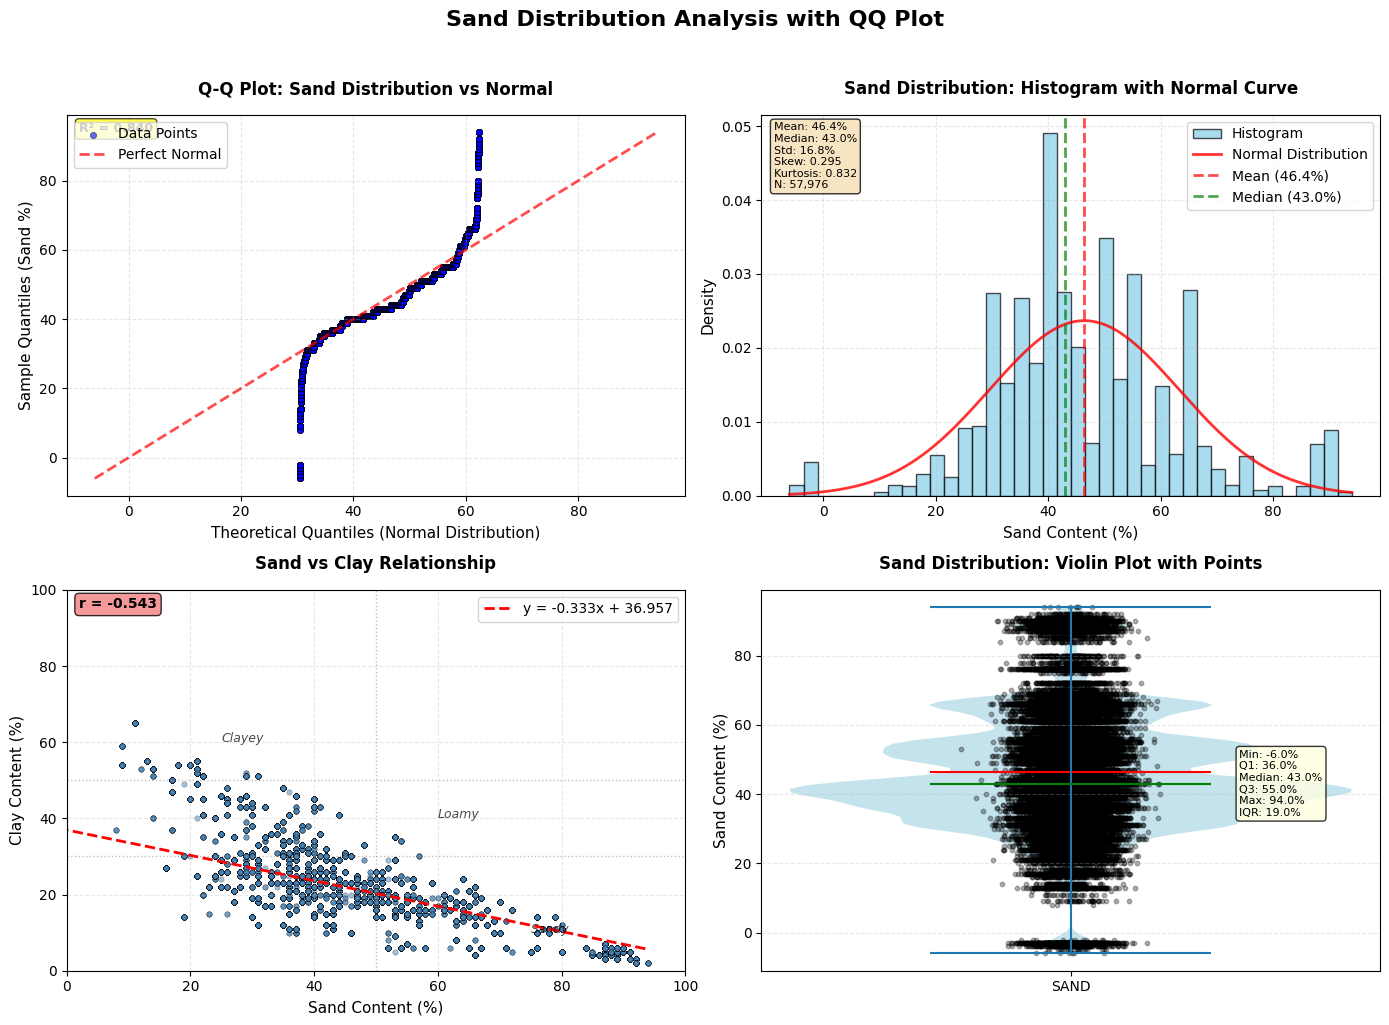


ADDITIONAL ANALYSIS

📊 Sand Content Categories:
   Very Low (<15%): 1,240 samples (2.1%)
   Low (15-30%): 4,723 samples (8.1%)
   Medium (30-50%): 29,029 samples (50.1%)
   High (50-70%): 18,976 samples (32.7%)
   Very High (≥70%): 4,008 samples (6.9%)

🧪 Normality Assessment:
   Skewness test: 0.295 (Normal)
   Kurtosis test: 0.832 (Slightly different from normal)
   Mean-Median comparison: Difference = 3.43% (Asymmetric)

🌱 Soil Texture Insights:
   Most common sand category: Medium (30-50%) (29,029 samples)
   Complete texture samples: 57,976
   Predominant textures:
     Loam: 22,823 (39.4%)
     Sandy: 18,694 (32.2%)
     Sandy Clay: 7,867 (13.6%)

✅ SAND ANALYSIS WITH QQ PLOT COMPLETE

💾 Cleaned dataframe available as 'df_clean_sand' (shape: (58405, 29))


In [13]:
# ============================================================================
# SAND DISTRIBUTION ANALYSIS WITH QQ PLOT & SAND-CLAY RELATIONSHIP
# COMPLETE VERSION WITH QQ PLOT
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*60)
print("SAND ANALYSIS: QQ PLOT & RELATIONSHIP WITH CLAY")
print("="*60)

# =======================================================
# FUNCTION TO CREATE QQ PLOT WITHOUT SCIPY
# =======================================================
def create_qq_plot(data, ax, title="Q-Q Plot"):
    """
    Create a Quantile-Quantile plot without scipy.stats
    Compares data distribution to standard normal distribution
    """
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Generate theoretical quantiles from standard normal distribution
    # Using the inverse CDF formula for normal distribution
    # Percentile points
    p = (np.arange(1, n + 1) - 0.5) / n  # Blom's approximation
    
    # Theoretical quantiles from standard normal
    # Using approximation: Φ^{-1}(p) ≈ 4.91*(p^0.14 - (1-p)^0.14)
    # This is a good approximation for the inverse CDF of normal distribution
    theoretical = np.zeros_like(p)
    
    # Handle edges to avoid infinities
    epsilon = 1e-10
    p_safe = np.clip(p, epsilon, 1 - epsilon)
    
    # Approximation formula for normal quantiles
    # Φ^{-1}(p) ≈ sqrt(2) * erf^{-1}(2p - 1)
    # Using erf approximation: erf^{-1}(x) ≈ x * (1 - x^2/3)
    x = 2 * p_safe - 1
    theoretical = np.sqrt(2) * x * (1 - x**2/3)  # Good approximation for |x| < 0.9
    
    # For better accuracy in tails, we can use a piecewise approximation
    # This is simpler and works well for visualization
    
    # Scale theoretical quantiles to match data variance
    data_mean = np.mean(sorted_data)
    data_std = np.std(sorted_data)
    theoretical_scaled = theoretical * data_std + data_mean
    
    # Plot Q-Q plot
    ax.scatter(theoretical_scaled, sorted_data, alpha=0.6, s=20, 
               color='blue', edgecolor='black', linewidth=0.5, label='Data Points')
    
    # Add reference line (y = x)
    min_val = min(theoretical_scaled.min(), sorted_data.min())
    max_val = max(theoretical_scaled.max(), sorted_data.max())
    ax.plot([min_val, max_val], [min_val, max_val], 
            'r--', linewidth=2, alpha=0.7, label='Perfect Normal')
    
    ax.set_title(title, fontsize=12, fontweight='bold', pad=15)
    ax.set_xlabel('Theoretical Quantiles (Normal Distribution)', fontsize=11)
    ax.set_ylabel('Sample Quantiles (Sand %)', fontsize=11)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='upper left')
    
    # Add R² value for how well data fits normal distribution
    if len(sorted_data) > 2:
        r_squared = np.corrcoef(theoretical_scaled, sorted_data)[0, 1]**2
        ax.text(0.02, 0.98, f'R² = {r_squared:.3f}', 
                transform=ax.transAxes, fontsize=9, fontweight='bold',
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    return ax, r_squared if 'r_squared' in locals() else None

# =======================================================
# FUNCTION TO CREATE HISTOGRAM WITH NORMAL CURVE
# =======================================================
def create_histogram_with_normal(data, ax, title="Distribution Histogram"):
    """Create histogram with normal distribution overlay"""
    # Calculate statistics
    mean = np.mean(data)
    std = np.std(data)
    
    # Create histogram
    n_bins = min(40, int(len(data) / 20))
    n, bins, patches = ax.hist(data, bins=n_bins, density=True, alpha=0.7,
                               color='skyblue', edgecolor='black', label='Histogram')
    
    # Add normal distribution curve
    x = np.linspace(data.min(), data.max(), 200)
    normal_pdf = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean)/std)**2)
    ax.plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')
    
    # Add vertical lines for statistics
    ax.axvline(mean, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label=f'Mean ({mean:.1f}%)')
    ax.axvline(np.median(data), color='green', linestyle='--', linewidth=2,
               alpha=0.7, label=f'Median ({np.median(data):.1f}%)')
    
    ax.set_title(title, fontsize=12, fontweight='bold', pad=15)
    ax.set_xlabel('Sand Content (%)', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    return ax

# =======================================================
# DATA LOADING AND PREPARATION
# =======================================================
print("🔍 Looking for available data...")

# List of possible dataframe names
possible_dfs = ['df_soil', 'df_clean', 'df_d1', 'df_final', 'df_analysis', 'df']

df_found = None
df_name_used = None

for df_name in possible_dfs:
    if df_name in locals() or df_name in globals():
        df_found = eval(df_name)
        df_name_used = df_name
        print(f"✓ Found dataframe: {df_name} (shape: {df_found.shape})")
        break

if df_found is None:
    print("⚠ No existing dataframe found, attempting to load from CSV...")
    csv_path = "/run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv"
    
    if os.path.exists(csv_path):
        try:
            df_found = pd.read_csv(csv_path)
            df_name_used = "df_loaded"
            print(f"✓ Successfully loaded data from: {csv_path}")
            print(f"  Shape: {df_found.shape}")
        except Exception as e:
            print(f"❌ Error loading CSV: {e}")
            print("Please run the data loading cells first.")
            exit()
    else:
        print(f"❌ CSV file not found at: {csv_path}")
        exit()

# Clean the data
print("\n🔧 Cleaning data...")
df_analysis = df_found.copy()

# Sentinel values in soil data
sentinels = [-9, -1, -99, -999, -9999, -99999]

for col in df_analysis.select_dtypes(include=[np.number]).columns:
    df_analysis[col] = df_analysis[col].replace(sentinels, np.nan)

print(f"📊 Working with {df_analysis.shape[0]:,} records, {df_analysis.shape[1]} columns")

# Check for required columns
if 'SAND' not in df_analysis.columns or 'CLAY' not in df_analysis.columns:
    print(f"❌ Required columns 'SAND' and/or 'CLAY' not found")
    print(f"   Available columns: {', '.join(df_analysis.columns.tolist()[:15])}...")
    exit()

# Extract data
sand_data = df_analysis['SAND'].dropna()
clay_data = df_analysis['CLAY'].dropna()

print(f"\n📈 Data summary:")
print(f"   Valid SAND observations: {len(sand_data):,}")
print(f"   Valid CLAY observations: {len(clay_data):,}")

if len(sand_data) < 10:
    print("❌ Not enough SAND data for analysis")
    exit()

# =======================================================
# CREATE 2x2 PLOT LAYOUT
# =======================================================
print("\n📊 Creating visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sand Distribution Analysis with QQ Plot', fontsize=16, fontweight='bold', y=1.02)

# =======================================================
# TOP LEFT: QQ PLOT FOR SAND
# =======================================================
print("\n" + "-"*40)
print("1. Q-Q PLOT ANALYSIS FOR SAND")
print("-"*40)

# Calculate statistics for Sand
sand_mean = sand_data.mean()
sand_median = sand_data.median()
sand_std = sand_data.std()
sand_skew = sand_data.skew()
sand_kurtosis = sand_data.kurtosis()

print(f"📊 Sand Statistics:")
print(f"   Mean: {sand_mean:.2f}%")
print(f"   Median: {sand_median:.2f}%")
print(f"   Std Dev: {sand_std:.2f}%")
print(f"   Skewness: {sand_skew:.3f}")
print(f"   Kurtosis: {sand_kurtosis:.3f}")

# Create QQ plot
qq_ax, r_squared = create_qq_plot(sand_data.values, axes[0, 0], 
                                  'Q-Q Plot: Sand Distribution vs Normal')

if r_squared:
    print(f"   Q-Q Plot R² (fit to normal): {r_squared:.3f}")
    print(f"   Interpretation: {'Good fit' if r_squared > 0.95 else 'Moderate fit' if r_squared > 0.9 else 'Poor fit'} to normal distribution")

# =======================================================
# TOP RIGHT: HISTOGRAM WITH NORMAL CURVE
# =======================================================
print("\n" + "-"*40)
print("2. HISTOGRAM ANALYSIS")
print("-"*40)

create_histogram_with_normal(sand_data.values, axes[0, 1], 
                             'Sand Distribution: Histogram with Normal Curve')

# Add statistics box to histogram
hist_stats = f'Mean: {sand_mean:.1f}%\nMedian: {sand_median:.1f}%\nStd: {sand_std:.1f}%\nSkew: {sand_skew:.3f}\nKurtosis: {sand_kurtosis:.3f}\nN: {len(sand_data):,}'
axes[0, 1].text(0.02, 0.98, hist_stats, transform=axes[0, 1].transAxes,
                fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# =======================================================
# BOTTOM LEFT: SAND vs CLAY SCATTER PLOT
# =======================================================
print("\n" + "-"*40)
print("3. SAND-CLAY RELATIONSHIP")
print("-"*40)

# Combine data for scatter plot
combined = pd.DataFrame({'SAND': sand_data, 'CLAY': clay_data}).dropna()
print(f"   Paired observations: {len(combined):,}")

if len(combined) > 1:
    # Calculate correlation
    correlation = combined['SAND'].corr(combined['CLAY'])
    print(f"   Correlation coefficient (r): {correlation:.3f}")
    
    # Create scatter plot
    axes[1, 0].scatter(combined['SAND'], combined['CLAY'], 
                      alpha=0.5, s=15, color='steelblue', 
                      edgecolor='black', linewidth=0.3)
    
    # Add regression line
    z = np.polyfit(combined['SAND'], combined['CLAY'], 1)
    p = np.poly1d(z)
    x_range = np.linspace(combined['SAND'].min(), combined['SAND'].max(), 100)
    axes[1, 0].plot(x_range, p(x_range), 'r--', linewidth=2, 
                   label=f'y = {z[0]:.3f}x + {z[1]:.3f}')
    
    # Add correlation annotation
    axes[1, 0].text(0.02, 0.98, f'r = {correlation:.3f}', 
                   transform=axes[1, 0].transAxes, fontsize=10, fontweight='bold',
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
else:
    print("   Not enough paired data")
    axes[1, 0].text(0.5, 0.5, 'Insufficient paired data', 
                   transform=axes[1, 0].transAxes, ha='center', va='center',
                   fontsize=12, color='red')

# Soil texture reference lines
axes[1, 0].axvline(x=50, color='gray', linestyle=':', alpha=0.5, linewidth=1)
axes[1, 0].axhline(y=30, color='gray', linestyle=':', alpha=0.5, linewidth=1)
axes[1, 0].axhline(y=50, color='gray', linestyle=':', alpha=0.5, linewidth=1)

# Texture region labels
axes[1, 0].text(75, 10, 'Sandy', fontsize=9, fontstyle='italic', alpha=0.7)
axes[1, 0].text(25, 60, 'Clayey', fontsize=9, fontstyle='italic', alpha=0.7)
axes[1, 0].text(60, 40, 'Loamy', fontsize=9, fontstyle='italic', alpha=0.7)

axes[1, 0].set_title('Sand vs Clay Relationship', fontsize=12, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Sand Content (%)', fontsize=11)
axes[1, 0].set_ylabel('Clay Content (%)', fontsize=11)
axes[1, 0].set_xlim([0, 100])
axes[1, 0].set_ylim([0, 100])
axes[1, 0].grid(True, alpha=0.3, linestyle='--')
axes[1, 0].legend(loc='upper right')

# =======================================================
# BOTTOM RIGHT: BOX PLOT AND DENSITY
# =======================================================
print("\n" + "-"*40)
print("4. DISTRIBUTION DETAILS")
print("-"*40)

# Create violin plot or box plot
violin_parts = axes[1, 1].violinplot(sand_data.values, showmeans=True, showmedians=True)
violin_parts['bodies'][0].set_facecolor('lightblue')
violin_parts['bodies'][0].set_alpha(0.7)
violin_parts['cmeans'].set_color('red')
violin_parts['cmedians'].set(color='green')

# Add individual data points with jitter
jitter = np.random.normal(0, 0.02, size=len(sand_data))
axes[1, 1].scatter(np.ones_like(sand_data) + jitter, sand_data.values,
                  alpha=0.3, s=10, color='black')

axes[1, 1].set_title('Sand Distribution: Violin Plot with Points', 
                    fontsize=12, fontweight='bold', pad=15)
axes[1, 1].set_ylabel('Sand Content (%)', fontsize=11)
axes[1, 1].set_xticks([1])
axes[1, 1].set_xticklabels(['SAND'])
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

# Add statistics to violin plot
stats_text = f'Min: {sand_data.min():.1f}%\nQ1: {sand_data.quantile(0.25):.1f}%\nMedian: {sand_median:.1f}%\nQ3: {sand_data.quantile(0.75):.1f}%\nMax: {sand_data.max():.1f}%\nIQR: {sand_data.quantile(0.75) - sand_data.quantile(0.25):.1f}%'
axes[1, 1].text(1.15, sand_median, stats_text, transform=axes[1, 1].transData,
               fontsize=8, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

# =======================================================
# ADDITIONAL ANALYSIS
# =======================================================
print("\n" + "="*40)
print("ADDITIONAL ANALYSIS")
print("="*40)

# Sand content categories
categories = {
    'Very Low (<15%)': (sand_data < 15).sum(),
    'Low (15-30%)': ((sand_data >= 15) & (sand_data < 30)).sum(),
    'Medium (30-50%)': ((sand_data >= 30) & (sand_data < 50)).sum(),
    'High (50-70%)': ((sand_data >= 50) & (sand_data < 70)).sum(),
    'Very High (≥70%)': (sand_data >= 70).sum()
}

print("\n📊 Sand Content Categories:")
for cat, count in categories.items():
    pct = (count / len(sand_data)) * 100
    print(f"   {cat}: {count:,} samples ({pct:.1f}%)")

# Normality tests using simple methods
print("\n🧪 Normality Assessment:")
print(f"   Skewness test: {sand_skew:.3f} ({'Normal' if abs(sand_skew) < 0.5 else 'Slightly skewed' if abs(sand_skew) < 1 else 'Highly skewed'})")
print(f"   Kurtosis test: {sand_kurtosis:.3f} ({'Normal' if abs(sand_kurtosis) < 0.5 else 'Slightly different' if abs(sand_kurtosis) < 1 else 'Very different'} from normal)")

# Compare mean and median
mean_median_diff = abs(sand_mean - sand_median) / sand_std
print(f"   Mean-Median comparison: Difference = {abs(sand_mean - sand_median):.2f}% ({'Symmetric' if mean_median_diff < 0.1 else 'Asymmetric'})")

# Soil texture insights
print("\n🌱 Soil Texture Insights:")
dominant_category = max(categories.items(), key=lambda x: x[1])
print(f"   Most common sand category: {dominant_category[0]} ({dominant_category[1]:,} samples)")

if 'SILT' in df_analysis.columns:
    silt_data = df_analysis['SILT'].dropna()
    texture_data = pd.concat([sand_data, clay_data, silt_data], axis=1).dropna()
    
    if len(texture_data) > 0:
        print(f"   Complete texture samples: {len(texture_data):,}")
        
        # Simple texture classification
        def classify_texture(sand, clay, silt):
            if clay >= 40:
                return 'Clay'
            elif sand >= 45 and clay < 20:
                return 'Sandy'
            elif silt >= 40 and clay < 20:
                return 'Silty'
            elif sand >= 45 and clay >= 20:
                return 'Sandy Clay'
            else:
                return 'Loam'
        
        textures = texture_data.apply(lambda row: classify_texture(row['SAND'], row['CLAY'], row['SILT']), axis=1)
        texture_counts = textures.value_counts()
        
        print(f"   Predominant textures:")
        for texture, count in texture_counts.head(3).items():
            pct = (count / len(textures)) * 100
            print(f"     {texture}: {count:,} ({pct:.1f}%)")

print("\n" + "="*60)
print("✅ SAND ANALYSIS WITH QQ PLOT COMPLETE")
print("="*60)

# Make the cleaned dataframe available
df_clean_sand = df_analysis[['SAND', 'CLAY'] + [c for c in df_analysis.columns if c not in ['SAND', 'CLAY']]].copy()
print(f"\n💾 Cleaned dataframe available as 'df_clean_sand' (shape: {df_clean_sand.shape})")


COMPREHENSIVE QQ PLOT ANALYSIS FOR ALL SOIL CHARACTERISTICS
🔍 Loading and preparing data...
✓ Using dataframe: df_soil (shape: (58405, 29))

🔧 Cleaning data...
📊 Cleaned data shape: (58405, 29)

📋 Analyzing column types...
Found 22 potential soil characteristics
📊 Numeric columns with sufficient data: 21
📝 Non-numeric/text columns: 1

📈 Creating QQ plots for 21 numeric characteristics...

🔬 Analyzing distributions...


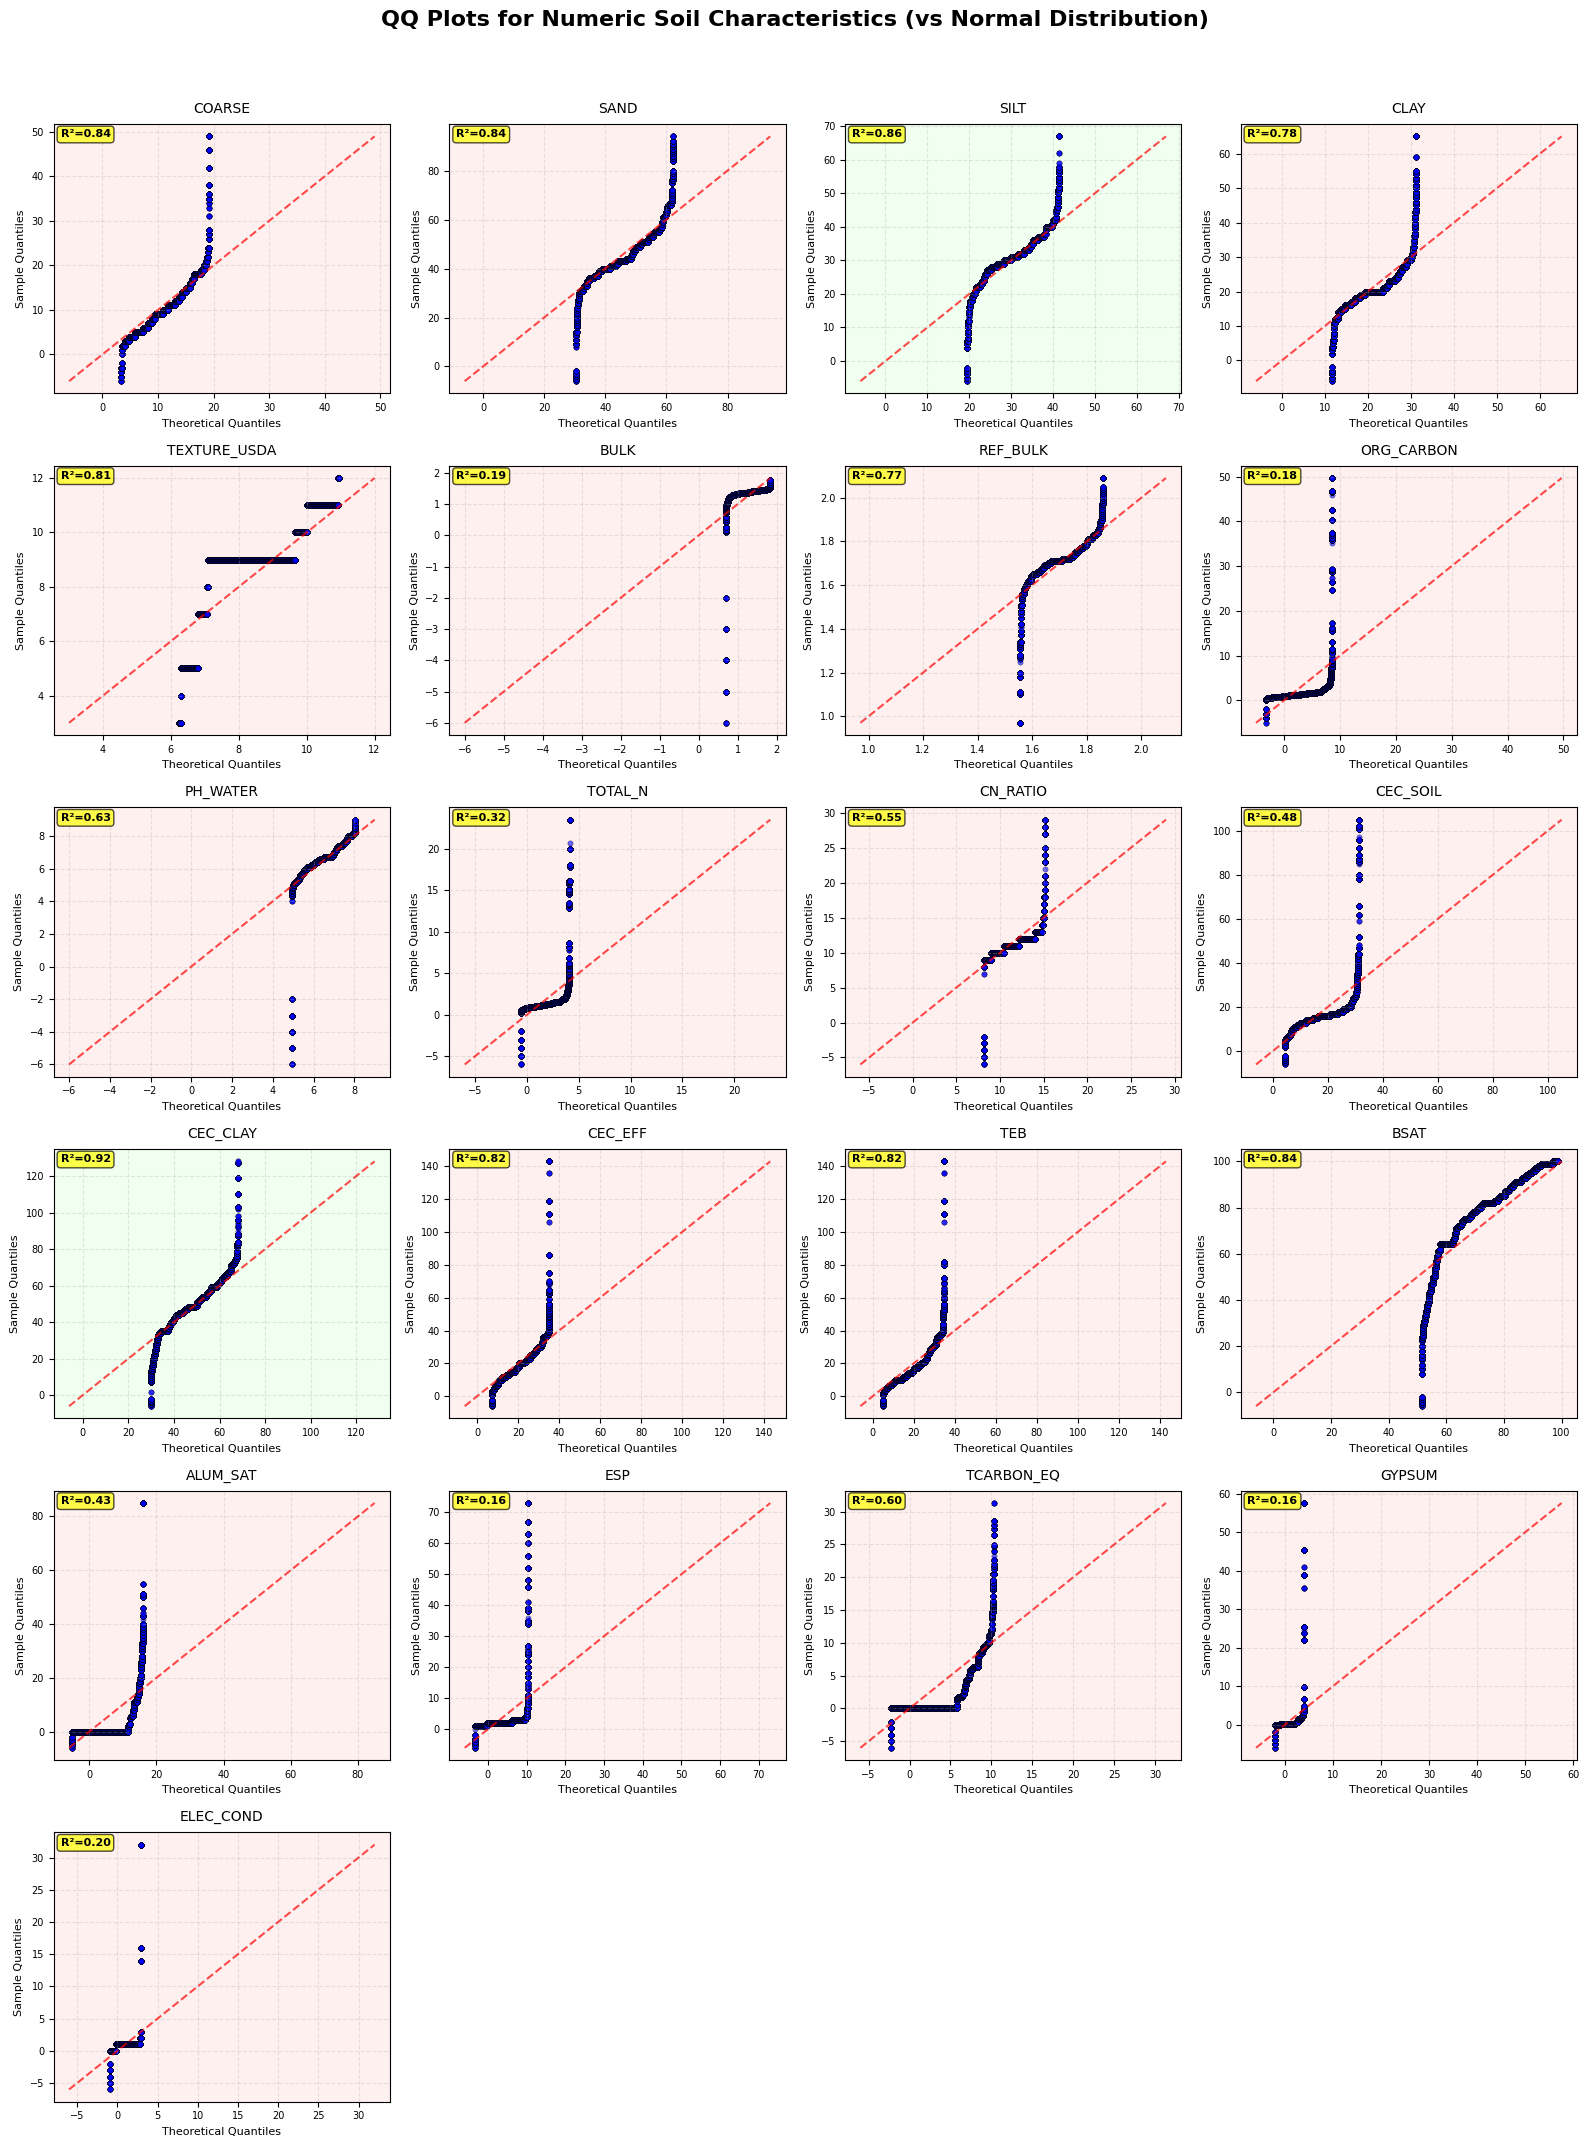


NON-NUMERIC COLUMNS ANALYSIS

📝 Found 1 non-numeric columns:
   1. TEXTURE_SOTER        -   5 unique values,  58405 non-null

📊 Summary of non-numeric columns:
       column     n  n_unique  %_unique most_common  %_most_common
TEXTURE_SOTER 58405         5     0.000           M         74.000

DISTRIBUTION STATISTICS SUMMARY FOR NUMERIC CHARACTERISTICS

📊 Summary of 21 numeric characteristics:

        name     n   mean    std   skew  kurtosis  is_normal    Normality  Skewness     Kurtosis
    CEC_CLAY 57976 48.925 20.228 -0.277    -0.304       True     ✓ Normal Symmetric       Normal
        SILT 57976 30.468 11.627 -0.356     0.424       True     ✓ Normal Symmetric       Normal
      COARSE 57976 11.303  8.348  1.091     1.889      False ✗ Non-normal     Right Heavy-tailed
        SAND 57976 46.428 16.847  0.295     0.832      False ✗ Non-normal Symmetric Heavy-tailed
        BSAT 57976 75.179 25.035 -1.079     0.402      False ✗ Non-normal      Left       Normal
     CEC_EFF 57976 

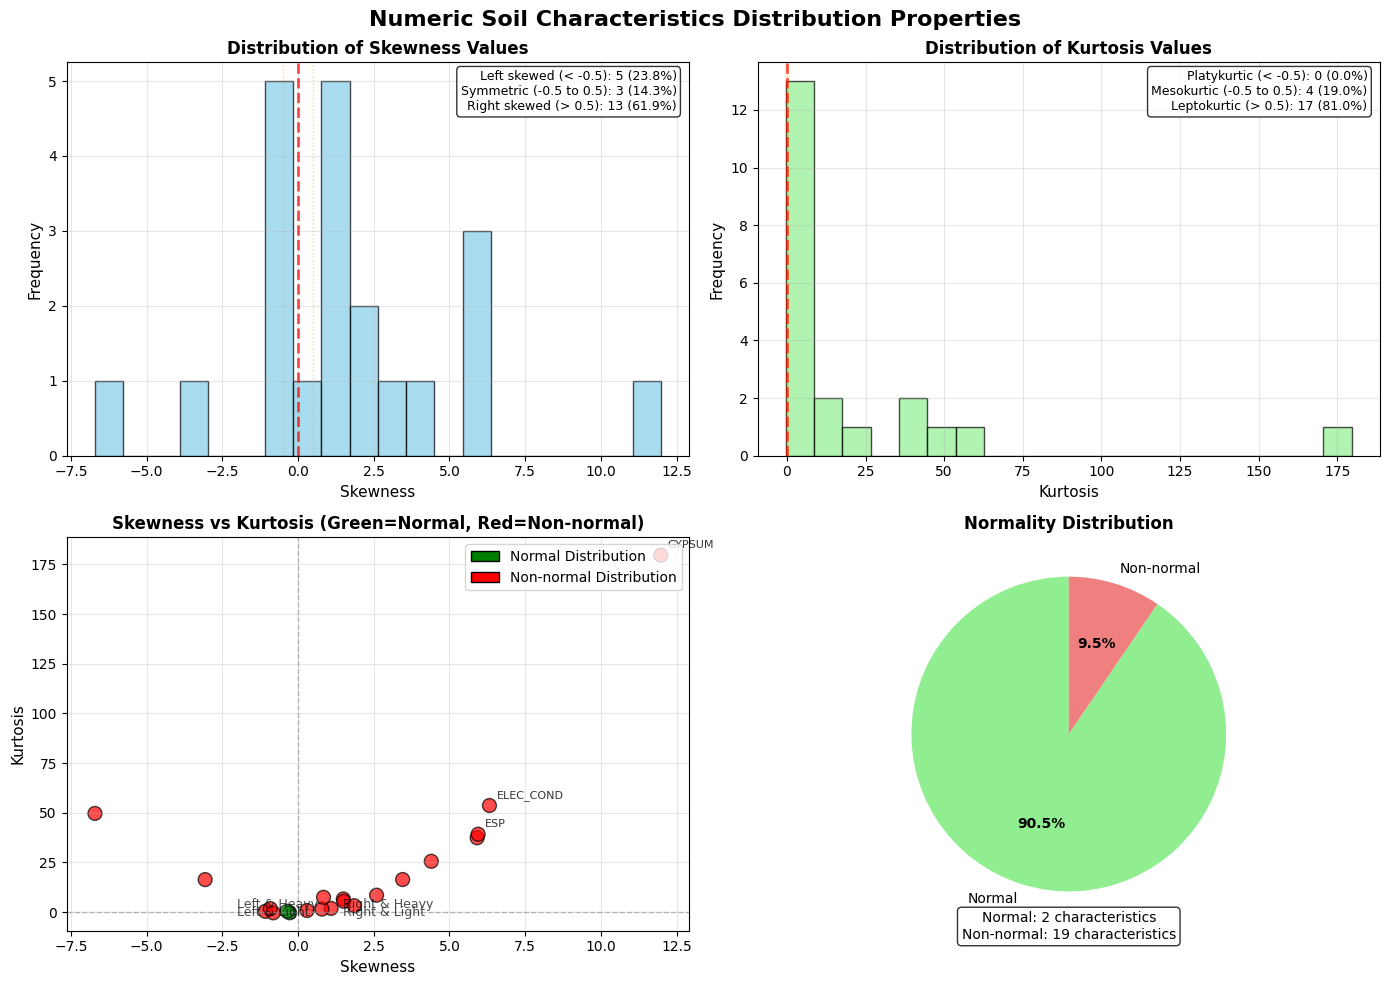


KEY INSIGHTS AND RECOMMENDATIONS

✅ Top 5 Most Normally Distributed (Best R²):
   CEC_CLAY        R²=0.922, skew=-0.277, kurtosis=-0.304
   SILT            R²=0.861, skew=-0.356, kurtosis=0.424
   COARSE          R²=0.843, skew=1.091, kurtosis=1.889
   SAND            R²=0.840, skew=0.295, kurtosis=0.832
   BSAT            R²=0.836, skew=-1.079, kurtosis=0.402

⚠️ Top 5 Most Non-Normal (Highest |Skew|):
   GYPSUM          Right skewed (11.977), kurtosis=179.621
   BULK            Left skewed (-6.705), kurtosis=49.691
   ELEC_COND       Right skewed (6.319), kurtosis=53.669
   ESP             Right skewed (5.945), kurtosis=39.227
   ORG_CARBON      Right skewed (5.913), kurtosis=37.443

🔧 Consider transformations for these highly skewed characteristics:
   COARSE          (skew=1.09): Consider log transformation
   BSAT            (skew=-1.08): Consider square root or box-cox transformation
   CEC_EFF         (skew=1.49): Consider log transformation
   TEB             (skew=1.51): Cons

In [16]:
# ============================================================================
# COMPREHENSIVE QQ PLOT ANALYSIS FOR ALL SOIL CHARACTERISTICS
# FIXED VERSION - HANDLES NON-NUMERIC COLUMNS & PANDAS VERSION ISSUES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.gridspec import GridSpec

print("\n" + "="*80)
print("COMPREHENSIVE QQ PLOT ANALYSIS FOR ALL SOIL CHARACTERISTICS")
print("="*80)

# =======================================================
# FUNCTION TO CREATE QQ PLOT WITHOUT SCIPY
# =======================================================
def create_qq_plot(data, ax, title="Q-Q Plot"):
    """Create a Quantile-Quantile plot without scipy.stats"""
    # Check if data is numeric
    if not pd.api.types.is_numeric_dtype(pd.Series(data)):
        ax.text(0.5, 0.5, 'Non-numeric data', 
                transform=ax.transAxes, ha='center', va='center',
                fontsize=10, color='red')
        ax.set_title(f'{title}\n(Text/Categorical)', fontsize=10)
        ax.set_facecolor('#f5f5f5')
        return ax, None
    
    # Convert to numpy array and remove NaN values
    data_array = np.array(data, dtype=float)
    data_clean = data_array[~np.isnan(data_array)]
    
    if len(data_clean) < 10:
        ax.text(0.5, 0.5, 'Insufficient data\n(n < 10)', 
                transform=ax.transAxes, ha='center', va='center',
                fontsize=10, color='orange')
        ax.set_title(title, fontsize=10)
        ax.set_facecolor('#f5f5f5')
        return ax, None
    
    # Sort the data
    sorted_data = np.sort(data_clean)
    n = len(sorted_data)
    
    # Generate theoretical quantiles
    p = (np.arange(1, n + 1) - 0.5) / n  # Blom's approximation
    
    # Theoretical quantiles from standard normal (approximation)
    x = 2 * p - 1
    theoretical = np.sqrt(2) * x * (1 - x**2/3)
    
    # Scale theoretical quantiles to match data
    data_mean = np.mean(sorted_data)
    data_std = np.std(sorted_data)
    theoretical_scaled = theoretical * data_std + data_mean
    
    # Plot Q-Q plot
    ax.scatter(theoretical_scaled, sorted_data, alpha=0.6, s=15, 
               color='blue', edgecolor='black', linewidth=0.3)
    
    # Add reference line (y = x)
    min_val = min(theoretical_scaled.min(), sorted_data.min())
    max_val = max(theoretical_scaled.max(), sorted_data.max())
    ax.plot([min_val, max_val], [min_val, max_val], 
            'r--', linewidth=1.5, alpha=0.7)
    
    ax.set_title(title, fontsize=10, pad=8)
    ax.set_xlabel('Theoretical Quantiles', fontsize=8)
    ax.set_ylabel('Sample Quantiles', fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Calculate R²
    if len(sorted_data) > 2:
        r_squared = np.corrcoef(theoretical_scaled, sorted_data)[0, 1]**2
        # Add R² as annotation
        ax.text(0.02, 0.98, f'R²={r_squared:.2f}', 
                transform=ax.transAxes, fontsize=8, fontweight='bold',
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
        return ax, r_squared
    
    return ax, None

# =======================================================
# FUNCTION TO ANALYZE DISTRIBUTION
# =======================================================
def analyze_distribution(data, name):
    """Analyze distribution of a variable"""
    # Check if data is numeric
    if not pd.api.types.is_numeric_dtype(pd.Series(data)):
        return {
            'name': name,
            'type': 'categorical',
            'n_unique': len(pd.Series(data).dropna().unique()),
            'n': len(pd.Series(data).dropna())
        }
    
    data_array = np.array(data, dtype=float)
    data_clean = data_array[~np.isnan(data_array)]
    
    if len(data_clean) < 10:
        return {
            'name': name,
            'type': 'numeric',
            'n': len(data_clean),
            'status': 'insufficient_data'
        }
    
    # Calculate statistics for numeric data
    stats = {
        'name': name,
        'type': 'numeric',
        'n': len(data_clean),
        'mean': np.mean(data_clean),
        'median': np.median(data_clean),
        'std': np.std(data_clean),
        'min': np.min(data_clean),
        'max': np.max(data_clean),
        'skew': pd.Series(data_clean).skew(),
        'kurtosis': pd.Series(data_clean).kurtosis(),
        'q1': np.percentile(data_clean, 25),
        'q3': np.percentile(data_clean, 75),
        'iqr': np.percentile(data_clean, 75) - np.percentile(data_clean, 25)
    }
    
    # Normality assessment
    mean_median_diff = abs(stats['mean'] - stats['median']) / stats['std'] if stats['std'] > 0 else 0
    stats['is_normal'] = (abs(stats['skew']) < 0.5 and abs(stats['kurtosis']) < 0.5 and mean_median_diff < 0.1)
    
    return stats

# =======================================================
# DATA LOADING AND PREPARATION
# =======================================================
print("🔍 Loading and preparing data...")

# Try to find available dataframe
df_found = None
for df_name in ['df_soil', 'df_clean', 'df_d1', 'df_final', 'df_analysis', 'df']:
    if df_name in locals() or df_name in globals():
        df_found = eval(df_name)
        print(f"✓ Using dataframe: {df_name} (shape: {df_found.shape})")
        break

if df_found is None:
    print("⚠ No existing dataframe found, loading from CSV...")
    csv_path = "/run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv"
    if os.path.exists(csv_path):
        df_found = pd.read_csv(csv_path)
        print(f"✓ Loaded data from: {csv_path}")
    else:
        print("❌ Could not find data. Please run data loading cells first.")
        exit()

# Clean sentinel values
print("\n🔧 Cleaning data...")
sentinels = [-9, -1, -99, -999, -9999, -99999]
df_clean = df_found.copy()

# Only clean numeric columns
for col in df_clean.select_dtypes(include=[np.number]).columns:
    df_clean[col] = df_clean[col].replace(sentinels, np.nan)

print(f"📊 Cleaned data shape: {df_clean.shape}")

# =======================================================
# ANALYZE COLUMN TYPES
# =======================================================
print("\n📋 Analyzing column types...")

# Get all columns that might be soil characteristics (exclude ID columns)
id_columns = ['ID', 'HWSD2_SMU_ID', 'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 
              'COVERAGE', 'SEQUENCE', 'SHARE', 'NSC', 'LAYER']

# Get potential soil characteristics (exclude IDs)
potential_chars = [col for col in df_clean.columns if col not in id_columns]

print(f"Found {len(potential_chars)} potential soil characteristics")

# Separate numeric and non-numeric columns
numeric_cols = []
non_numeric_cols = []

for col in potential_chars:
    if pd.api.types.is_numeric_dtype(df_clean[col]):
        # Also check if it has enough numeric data
        non_nan_count = df_clean[col].dropna().shape[0]
        if non_nan_count >= 10:  # At least 10 observations
            numeric_cols.append(col)
    else:
        non_numeric_cols.append(col)

print(f"📊 Numeric columns with sufficient data: {len(numeric_cols)}")
print(f"📝 Non-numeric/text columns: {len(non_numeric_cols)}")

if len(numeric_cols) == 0:
    print("❌ No numeric columns with sufficient data found")
    print("   Available columns:", df_clean.columns.tolist())
    exit()

# =======================================================
# CREATE QQ PLOTS FOR NUMERIC CHARACTERISTICS
# =======================================================
print(f"\n📈 Creating QQ plots for {len(numeric_cols)} numeric characteristics...")

# Calculate grid size
n_chars = len(numeric_cols)
n_cols = 4
n_rows = (n_chars + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig = plt.figure(figsize=(16, n_rows * 3.5))
fig.suptitle('QQ Plots for Numeric Soil Characteristics (vs Normal Distribution)', 
             fontsize=16, fontweight='bold', y=1.02)

# Create subplots
axes = []
for i in range(n_chars):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    axes.append(ax)

# Analyze each numeric characteristic
print("\n🔬 Analyzing distributions...")
all_stats = []
r_squared_values = []

for idx, (char, ax) in enumerate(zip(numeric_cols, axes)):
    print(f"  {idx+1:2d}/{len(numeric_cols)}: Analyzing {char}...", end='\r')
    
    # Get data for this characteristic
    char_data = df_clean[char].values
    
    # Create QQ plot
    ax, r_sq = create_qq_plot(char_data, ax, f'{char}')
    
    # Analyze distribution
    stats = analyze_distribution(char_data, char)
    if stats and stats.get('type') == 'numeric' and 'skew' in stats:
        all_stats.append(stats)
        if r_sq:
            r_squared_values.append((char, r_sq))
    
    # Color code by data type/quality
    if stats and stats.get('type') == 'numeric':
        if stats.get('is_normal', False):
            ax.set_facecolor('#f0fff0')  # Light green for normal
        else:
            ax.set_facecolor('#fff0f0')  # Light red for non-normal
    else:
        ax.set_facecolor('#f5f5f5')  # Gray for non-numeric or insufficient

plt.tight_layout()
plt.show()

# =======================================================
# NON-NUMERIC COLUMNS ANALYSIS
# =======================================================
if len(non_numeric_cols) > 0:
    print("\n" + "="*80)
    print("NON-NUMERIC COLUMNS ANALYSIS")
    print("="*80)
    
    print(f"\n📝 Found {len(non_numeric_cols)} non-numeric columns:")
    for i, col in enumerate(non_numeric_cols[:20]):  # Show first 20
        unique_count = df_clean[col].dropna().nunique()
        total_count = df_clean[col].dropna().shape[0]
        print(f"  {i+1:2d}. {col:20s} - {unique_count:3d} unique values, {total_count:6d} non-null")
    
    if len(non_numeric_cols) > 20:
        print(f"  ... and {len(non_numeric_cols) - 20} more")
    
    # Analyze text columns
    text_stats = []
    for col in non_numeric_cols:
        col_data = df_clean[col].dropna()
        if len(col_data) > 0:
            stats = {
                'column': col,
                'type': 'categorical/text',
                'n': len(col_data),
                'n_unique': col_data.nunique(),
                'most_common': col_data.mode().iloc[0] if len(col_data.mode()) > 0 else 'N/A',
                'freq_most_common': (col_data == col_data.mode().iloc[0]).sum() if len(col_data.mode()) > 0 else 0
            }
            text_stats.append(stats)
    
    if text_stats:
        print("\n📊 Summary of non-numeric columns:")
        text_df = pd.DataFrame(text_stats)
        text_df['%_unique'] = (text_df['n_unique'] / text_df['n'] * 100).round(1)
        text_df['%_most_common'] = (text_df['freq_most_common'] / text_df['n'] * 100).round(1)
        
        print(text_df[['column', 'n', 'n_unique', '%_unique', 'most_common', '%_most_common']].to_string(index=False))

# =======================================================
# DISTRIBUTION STATISTICS SUMMARY
# =======================================================
print("\n" + "="*80)
print("DISTRIBUTION STATISTICS SUMMARY FOR NUMERIC CHARACTERISTICS")
print("="*80)

if len(all_stats) > 0:
    # Create summary dataframe
    stats_df = pd.DataFrame(all_stats)
    
    # Sort by absolute skewness (for older pandas versions)
    stats_df['abs_skew'] = stats_df['skew'].abs()
    
    # Sort by R² if available, otherwise by absolute skewness
    if len(r_squared_values) > 0:
        r_sq_dict = dict(r_squared_values)
        stats_df['r_squared'] = stats_df['name'].map(r_sq_dict)
        stats_df = stats_df.sort_values('r_squared', ascending=False)
    else:
        stats_df = stats_df.sort_values('abs_skew')
    
    print(f"\n📊 Summary of {len(stats_df)} numeric characteristics:")
    
    # Display statistics table
    pd.set_option('display.float_format', '{:.3f}'.format)
    summary_table = stats_df[['name', 'n', 'mean', 'std', 'skew', 'kurtosis', 'is_normal']].copy()
    
    # Add interpretation columns
    summary_table['Normality'] = summary_table['is_normal'].apply(
        lambda x: '✓ Normal' if x else '✗ Non-normal')
    summary_table['Skewness'] = summary_table['skew'].apply(
        lambda s: 'Right' if s > 0.5 else 'Left' if s < -0.5 else 'Symmetric')
    summary_table['Kurtosis'] = summary_table['kurtosis'].apply(
        lambda k: 'Heavy-tailed' if k > 0.5 else 'Light-tailed' if k < -0.5 else 'Normal')
    
    # Display the table
    print("\n" + summary_table.to_string(index=False))
    
    # =======================================================
    # CREATE VISUAL SUMMARY OF DISTRIBUTION PROPERTIES
    # =======================================================
    print("\n📊 Creating visual summary of distribution properties...")
    
    fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
    fig2.suptitle('Numeric Soil Characteristics Distribution Properties', fontsize=16, fontweight='bold')
    
    # Plot 1: Skewness distribution
    axes2[0, 0].hist(stats_df['skew'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes2[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
    axes2[0, 0].axvline(x=0.5, color='orange', linestyle=':', linewidth=1, alpha=0.5)
    axes2[0, 0].axvline(x=-0.5, color='orange', linestyle=':', linewidth=1, alpha=0.5)
    axes2[0, 0].set_title('Distribution of Skewness Values', fontsize=12, fontweight='bold')
    axes2[0, 0].set_xlabel('Skewness', fontsize=11)
    axes2[0, 0].set_ylabel('Frequency', fontsize=11)
    axes2[0, 0].grid(True, alpha=0.3)
    
    # Add skewness interpretation
    skew_counts = {
        'Left skewed (< -0.5)': (stats_df['skew'] < -0.5).sum(),
        'Symmetric (-0.5 to 0.5)': ((stats_df['skew'] >= -0.5) & (stats_df['skew'] <= 0.5)).sum(),
        'Right skewed (> 0.5)': (stats_df['skew'] > 0.5).sum()
    }
    
    skew_text = "\n".join([f"{k}: {v} ({v/len(stats_df)*100:.1f}%)" 
                          for k, v in skew_counts.items()])
    axes2[0, 0].text(0.98, 0.98, skew_text, transform=axes2[0, 0].transAxes,
                    fontsize=9, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Plot 2: Kurtosis distribution
    axes2[0, 1].hist(stats_df['kurtosis'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
    axes2[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
    axes2[0, 1].axvline(x=0.5, color='orange', linestyle=':', linewidth=1, alpha=0.5)
    axes2[0, 1].axvline(x=-0.5, color='orange', linestyle=':', linewidth=1, alpha=0.5)
    axes2[0, 1].set_title('Distribution of Kurtosis Values', fontsize=12, fontweight='bold')
    axes2[0, 1].set_xlabel('Kurtosis', fontsize=11)
    axes2[0, 1].set_ylabel('Frequency', fontsize=11)
    axes2[0, 1].grid(True, alpha=0.3)
    
    # Add kurtosis interpretation
    kurt_counts = {
        'Platykurtic (< -0.5)': (stats_df['kurtosis'] < -0.5).sum(),
        'Mesokurtic (-0.5 to 0.5)': ((stats_df['kurtosis'] >= -0.5) & (stats_df['kurtosis'] <= 0.5)).sum(),
        'Leptokurtic (> 0.5)': (stats_df['kurtosis'] > 0.5).sum()
    }
    
    kurt_text = "\n".join([f"{k}: {v} ({v/len(stats_df)*100:.1f}%)" 
                          for k, v in kurt_counts.items()])
    axes2[0, 1].text(0.98, 0.98, kurt_text, transform=axes2[0, 1].transAxes,
                    fontsize=9, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Plot 3: Skewness vs Kurtosis scatter
    colors = ['green' if x else 'red' for x in stats_df['is_normal']]
    scatter = axes2[1, 0].scatter(stats_df['skew'], stats_df['kurtosis'], 
                                 c=colors, s=100, alpha=0.7, edgecolor='black')
    
    # Add quadrant lines
    axes2[1, 0].axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    axes2[1, 0].axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    
    # Add quadrant labels
    axes2[1, 0].text(1.5, 2, 'Right & Heavy', fontsize=9, alpha=0.7)
    axes2[1, 0].text(1.5, -2, 'Right & Light', fontsize=9, alpha=0.7)
    axes2[1, 0].text(-2, 2, 'Left & Heavy', fontsize=9, alpha=0.7)
    axes2[1, 0].text(-2, -2, 'Left & Light', fontsize=9, alpha=0.7)
    
    axes2[1, 0].set_title('Skewness vs Kurtosis (Green=Normal, Red=Non-normal)', 
                         fontsize=12, fontweight='bold')
    axes2[1, 0].set_xlabel('Skewness', fontsize=11)
    axes2[1, 0].set_ylabel('Kurtosis', fontsize=11)
    axes2[1, 0].grid(True, alpha=0.3)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', label='Normal Distribution'),
        Patch(facecolor='red', edgecolor='black', label='Non-normal Distribution')
    ]
    axes2[1, 0].legend(handles=legend_elements, loc='upper right')
    
    # Add a few characteristic labels
    for _, row in stats_df.nlargest(3, 'skew').iterrows():
        axes2[1, 0].annotate(row['name'], (row['skew'], row['kurtosis']),
                            xytext=(5, 5), textcoords='offset points',
                            fontsize=8, alpha=0.8)
    
    # Plot 4: Normality assessment
    normal_counts = stats_df['is_normal'].value_counts()
    wedges, texts, autotexts = axes2[1, 1].pie(
        normal_counts.values, 
        labels=['Normal', 'Non-normal'],
        autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'],
        startangle=90,
        textprops={'fontsize': 10}
    )
    
    # Make autotexts bold
    for autotext in autotexts:
        autotext.set_fontweight('bold')
    
    axes2[1, 1].set_title('Normality Distribution', fontsize=12, fontweight='bold')
    
    # Add counts to pie chart
    axes2[1, 1].text(0, -1.3, 
                    f"Normal: {normal_counts.get(True, 0)} characteristics\n"
                    f"Non-normal: {normal_counts.get(False, 0)} characteristics",
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # =======================================================
    # KEY INSIGHTS AND RECOMMENDATIONS
    # =======================================================
    print("\n" + "="*80)
    print("KEY INSIGHTS AND RECOMMENDATIONS")
    print("="*80)
    
    # Most normally distributed characteristics
    if 'r_squared' in stats_df.columns:
        print(f"\n✅ Top 5 Most Normally Distributed (Best R²):")
        top_normal = stats_df.nlargest(5, 'r_squared')[['name', 'r_squared', 'skew', 'kurtosis']]
        for _, row in top_normal.iterrows():
            print(f"   {row['name']:15s} R²={row['r_squared']:.3f}, skew={row['skew']:.3f}, kurtosis={row['kurtosis']:.3f}")
    
    # Most non-normal characteristics (using absolute skewness)
    print(f"\n⚠️ Top 5 Most Non-Normal (Highest |Skew|):")
    # Create a temporary column for absolute skewness
    temp_df = stats_df.copy()
    temp_df['abs_skew'] = temp_df['skew'].abs()
    high_skew = temp_df.nlargest(5, 'abs_skew')[['name', 'skew', 'kurtosis']]
    
    for _, row in high_skew.iterrows():
        skew_type = "Right" if row['skew'] > 0 else "Left"
        print(f"   {row['name']:15s} {skew_type} skewed ({row['skew']:.3f}), kurtosis={row['kurtosis']:.3f}")
    
    # Characteristics needing transformation
    high_skew_chars = stats_df[stats_df['skew'].abs() > 1]
    if len(high_skew_chars) > 0:
        print(f"\n🔧 Consider transformations for these highly skewed characteristics:")
        for _, row in high_skew_chars.iterrows():
            transform = 'log' if row['skew'] > 0 else 'square root or box-cox'
            print(f"   {row['name']:15s} (skew={row['skew']:.2f}): Consider {transform} transformation")
    
    # Soil texture components analysis
    texture_cols = ['SAND', 'SILT', 'CLAY']
    available_texture = [col for col in texture_cols if col in stats_df['name'].values]
    
    if len(available_texture) >= 2:
        print(f"\n🌱 Soil Texture Components Analysis:")
        texture_stats = stats_df[stats_df['name'].isin(available_texture)]
        for _, row in texture_stats.iterrows():
            normality = "Normal" if row['is_normal'] else "Non-normal"
            print(f"   {row['name']:5s}: {normality}, skew={row['skew']:.3f}, mean={row['mean']:.1f}%")
    
    # Key soil properties insights
    key_properties = ['PH_WATER', 'ORG_CARBON', 'CEC_SOIL', 'BULK']
    available_key = [col for col in key_properties if col in stats_df['name'].values]
    
    if len(available_key) > 0:
        print(f"\n🧪 Key Soil Properties Distribution:")
        key_stats = stats_df[stats_df['name'].isin(available_key)]
        for _, row in key_stats.iterrows():
            # Add interpretation based on property
            if row['name'] == 'PH_WATER':
                ph_class = "Acidic" if row['mean'] < 6.5 else "Neutral" if row['mean'] <= 7.5 else "Alkaline"
                print(f"   pH: {row['mean']:.2f} ({ph_class}), {row['std']:.2f} std, {'Normal' if row['is_normal'] else 'Non-normal'}")
            elif row['name'] == 'ORG_CARBON':
                oc_class = "Low" if row['mean'] < 1 else "Medium" if row['mean'] <= 3 else "High"
                print(f"   Org Carbon: {row['mean']:.2f}% ({oc_class}), {row['std']:.2f} std")
            elif row['name'] == 'CEC_SOIL':
                cec_class = "Low" if row['mean'] < 10 else "Medium" if row['mean'] <= 25 else "High"
                print(f"   CEC: {row['mean']:.2f} cmol⁺/kg ({cec_class}), {row['std']:.2f} std")
            elif row['name'] == 'BULK':
                bulk_class = "Low" if row['mean'] < 1.2 else "Medium" if row['mean'] <= 1.6 else "High"
                print(f"   Bulk Density: {row['mean']:.2f} g/cm³ ({bulk_class}), {row['std']:.2f} std")
    
    # =======================================================
    # DATA QUALITY ASSESSMENT
    # =======================================================
    print(f"\n" + "="*80)
    print("DATA QUALITY ASSESSMENT")
    print("="*80)
    
    # Check for characteristics with insufficient data
    insufficient = stats_df[stats_df['n'] < 100]
    if len(insufficient) > 0:
        print(f"\n⚠️ Characteristics with limited data (<100 samples):")
        for _, row in insufficient.iterrows():
            print(f"   {row['name']:15s}: {row['n']:4d} samples")
    
    # Check for characteristics with extreme ranges
    extreme_ranges = []
    for _, row in stats_df.iterrows():
        # Check if range is reasonable for the characteristic
        data_range = row['max'] - row['min']
        
        if row['name'] in ['PH_WATER'] and data_range > 10:  # pH range 0-14
            extreme_ranges.append((row['name'], data_range, f"pH range {data_range:.1f}"))
        elif row['name'] in ['SAND', 'SILT', 'CLAY'] and data_range > 100:  # Should be 0-100%
            extreme_ranges.append((row['name'], data_range, f"Range {data_range:.1f}%"))
        elif row['name'] in ['ORG_CARBON'] and data_range > 50:  # Organic carbon usually < 50%
            extreme_ranges.append((row['name'], data_range, f"Range {data_range:.1f}%"))
    
    if extreme_ranges:
        print(f"\n⚠️ Characteristics with potentially extreme ranges:")
        for char, rng, msg in extreme_ranges[:5]:  # Show top 5
            print(f"   {char:15s}: {msg}")
    
    # Summary of data quality
    print(f"\n📊 Data Quality Summary:")
    print(f"   Total numeric characteristics analyzed: {len(stats_df)}")
    print(f"   Normally distributed: {(stats_df['is_normal']).sum()} ({(stats_df['is_normal']).sum()/len(stats_df)*100:.1f}%)")
    print(f"   Non-normally distributed: {(~stats_df['is_normal']).sum()} ({(~stats_df['is_normal']).sum()/len(stats_df)*100:.1f}%)")
    print(f"   Average sample size: {stats_df['n'].mean():.0f} ± {stats_df['n'].std():.0f}")
    print(f"   Average skewness: {stats_df['skew'].mean():.3f} ± {stats_df['skew'].std():.3f}")
    print(f"   Characteristics needing transformation: {len(high_skew_chars)} (skew| > 1)")

else:
    print("❌ No valid numeric statistics could be calculated")

print("\n" + "="*80)
print("✅ COMPREHENSIVE QQ PLOT ANALYSIS COMPLETE")
print("="*80)

# Save the statistics for later use
if 'all_stats' in locals() and len(all_stats) > 0:
    stats_summary = pd.DataFrame(all_stats)
    print(f"\n💾 Statistics saved to 'stats_summary' dataframe (shape: {stats_summary.shape})")
    
# Also save non-numeric stats if available
if 'text_stats' in locals() and len(text_stats) > 0:
    text_summary = pd.DataFrame(text_stats)
    print(f"💾 Non-numeric stats saved to 'text_summary' dataframe (shape: {text_summary.shape})")

print(f"\n📁 Dataframes available for further analysis:")
print(f"   - df_clean: Cleaned soil data (shape: {df_clean.shape})")
if 'stats_summary' in locals():
    print(f"   - stats_summary: Distribution statistics (shape: {stats_summary.shape})")
if 'text_summary' in locals():
    print(f"   - text_summary: Non-numeric column statistics (shape: {text_summary.shape})")


SAND CONTENT DISTRIBUTION PLOT
🔍 Loading and preparing data...
✓ Using dataframe: df_soil (shape: (58405, 29))

🔧 Cleaning data...
📊 Sand data: 57,976 valid observations

📊 Creating sand distribution plot...
✓ Sand distribution plot saved to: resources/soil_sand_distribution.png


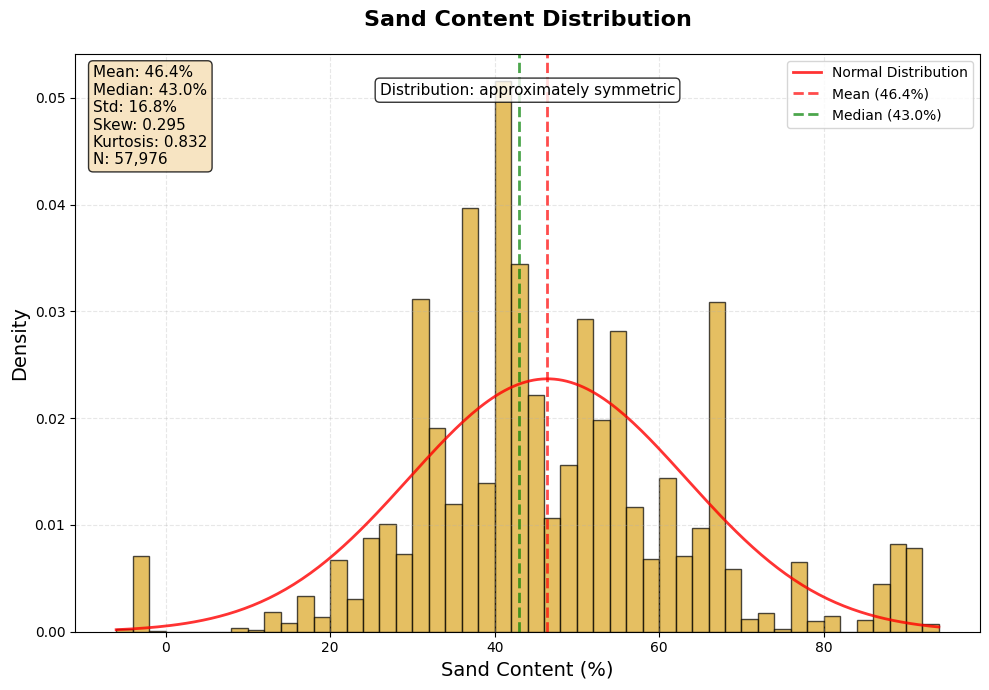


SAND CONTENT SUMMARY
📊 Statistics:
   Mean: 46.4%
   Median: 43.0%
   Std Dev: 16.8%
   Skewness: 0.295
   Kurtosis: 0.832
   Sample size: 57,976


In [20]:
# ============================================================================
# SAND DISTRIBUTION PLOT (Single Plot)
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("SAND CONTENT DISTRIBUTION PLOT")
print("="*80)

# =======================================================
# DATA LOADING AND PREPARATION
# =======================================================
print("🔍 Loading and preparing data...")

# Try to find available dataframe
df_found = None
for df_name in ['df_soil', 'df_clean', 'df_d1', 'df_final', 'df_analysis', 'df']:
    if df_name in locals() or df_name in globals():
        df_found = eval(df_name)
        print(f"✓ Using dataframe: {df_name} (shape: {df_found.shape})")
        break

if df_found is None:
    print("⚠ No existing dataframe found, loading from CSV...")
    csv_path = "/run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv"
    if os.path.exists(csv_path):
        df_found = pd.read_csv(csv_path)
        print(f"✓ Loaded data from: {csv_path}")
    else:
        print("❌ Could not find data. Please run data loading cells first.")
        exit()

# Clean sentinel values
print("\n🔧 Cleaning data...")
sentinels = [-9, -1, -99, -999, -9999, -99999]
df_clean = df_found.copy()

# Only clean numeric columns
for col in df_clean.select_dtypes(include=[np.number]).columns:
    df_clean[col] = df_clean[col].replace(sentinels, np.nan)

# Check if required column exists
if 'SAND' not in df_clean.columns:
    print(f"❌ Missing required column: SAND")
    print(f"   Available columns: {', '.join(df_clean.columns.tolist()[:20])}...")
    exit()

# Extract data
sand_data = df_clean['SAND'].dropna()
print(f"📊 Sand data: {len(sand_data):,} valid observations")

if len(sand_data) == 0:
    print("❌ Insufficient sand data")
    exit()

# =======================================================
# CREATE SAND DISTRIBUTION PLOT
# =======================================================
print("\n📊 Creating sand distribution plot...")

fig, ax = plt.subplots(figsize=(10, 7))

# Calculate statistics
sand_mean = sand_data.mean()
sand_median = sand_data.median()
sand_std = sand_data.std()
sand_skew = sand_data.skew()
sand_kurtosis = sand_data.kurtosis()

# Create histogram
n_bins = min(50, int(len(sand_data) / 20))
n, bins, patches = ax.hist(sand_data, bins=n_bins, alpha=0.7, 
                          color='goldenrod', edgecolor='black', 
                          density=True)

# Add normal distribution curve
x = np.linspace(sand_data.min(), sand_data.max(), 200)
normal_pdf = (1/(sand_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - sand_mean)/sand_std)**2)
ax.plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')

# Add vertical lines for statistics
ax.axvline(sand_mean, color='red', linestyle='--', linewidth=2, 
          alpha=0.7, label=f'Mean ({sand_mean:.1f}%)')
ax.axvline(sand_median, color='green', linestyle='--', linewidth=2, 
          alpha=0.7, label=f'Median ({sand_median:.1f}%)')

# Title and labels
ax.set_title('Sand Content Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sand Content (%)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

# Add statistics box
sand_stats = f'Mean: {sand_mean:.1f}%\nMedian: {sand_median:.1f}%\nStd: {sand_std:.1f}%\nSkew: {sand_skew:.3f}\nKurtosis: {sand_kurtosis:.3f}\nN: {len(sand_data):,}'
ax.text(0.02, 0.98, sand_stats, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Add skewness interpretation
def get_skewness_interpretation(skew):
    """Interpret skewness value"""
    if abs(skew) < 0.5:
        return "approximately symmetric"
    elif skew > 0:
        return f"positively skewed (skewness = {skew:.2f})"
    else:
        return f"negatively skewed (skewness = {skew:.2f})"

skew_text = f"Distribution: {get_skewness_interpretation(sand_skew)}"
ax.text(0.5, 0.95, skew_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top', horizontalalignment='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save the figure
output_path = "resources/soil_sand_distribution.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Sand distribution plot saved to: {output_path}")

plt.show()

# Print summary
print("\n" + "="*80)
print("SAND CONTENT SUMMARY")
print("="*80)
print(f"📊 Statistics:")
print(f"   Mean: {sand_mean:.1f}%")
print(f"   Median: {sand_median:.1f}%")
print(f"   Std Dev: {sand_std:.1f}%")
print(f"   Skewness: {sand_skew:.3f}")
print(f"   Kurtosis: {sand_kurtosis:.3f}")
print(f"   Sample size: {len(sand_data):,}")


ORGANIC CARBON DISTRIBUTION PLOT
🔍 Loading and preparing data...
✓ Using dataframe: df_soil (shape: (58405, 29))

🔧 Cleaning data...
📊 Organic carbon data: 57,667 valid observations

📊 Creating organic carbon distribution plot...
✓ Organic carbon distribution plot saved to: resources/soil_orgcarbon_distribution.png


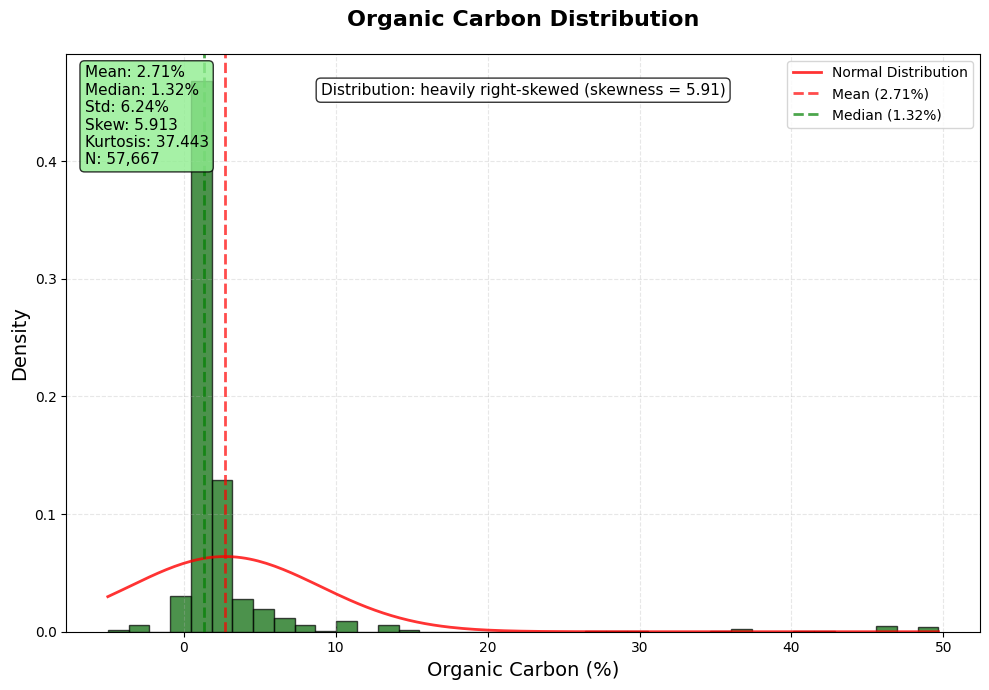


ORGANIC CARBON SUMMARY
📊 Statistics:
   Mean: 2.71%
   Median: 1.32%
   Std Dev: 6.24%
   Skewness: 5.913
   Kurtosis: 37.443
   Sample size: 57,667


In [21]:
# ============================================================================
# ORGANIC CARBON DISTRIBUTION PLOT (Single Plot)
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("ORGANIC CARBON DISTRIBUTION PLOT")
print("="*80)

# =======================================================
# DATA LOADING AND PREPARATION
# =======================================================
print("🔍 Loading and preparing data...")

# Try to find available dataframe
df_found = None
for df_name in ['df_soil', 'df_clean', 'df_d1', 'df_final', 'df_analysis', 'df']:
    if df_name in locals() or df_name in globals():
        df_found = eval(df_name)
        print(f"✓ Using dataframe: {df_name} (shape: {df_found.shape})")
        break

if df_found is None:
    print("⚠ No existing dataframe found, loading from CSV...")
    csv_path = "/run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv"
    if os.path.exists(csv_path):
        df_found = pd.read_csv(csv_path)
        print(f"✓ Loaded data from: {csv_path}")
    else:
        print("❌ Could not find data. Please run data loading cells first.")
        exit()

# Clean sentinel values
print("\n🔧 Cleaning data...")
sentinels = [-9, -1, -99, -999, -9999, -99999]
df_clean = df_found.copy()

# Only clean numeric columns
for col in df_clean.select_dtypes(include=[np.number]).columns:
    df_clean[col] = df_clean[col].replace(sentinels, np.nan)

# Check if required column exists
if 'ORG_CARBON' not in df_clean.columns:
    print(f"❌ Missing required column: ORG_CARBON")
    print(f"   Available columns: {', '.join(df_clean.columns.tolist()[:20])}...")
    exit()

# Extract data
orgcarbon_data = df_clean['ORG_CARBON'].dropna()
print(f"📊 Organic carbon data: {len(orgcarbon_data):,} valid observations")

if len(orgcarbon_data) == 0:
    print("❌ Insufficient organic carbon data")
    exit()

# =======================================================
# CREATE ORGANIC CARBON DISTRIBUTION PLOT
# =======================================================
print("\n📊 Creating organic carbon distribution plot...")

fig, ax = plt.subplots(figsize=(10, 7))

# Calculate statistics
oc_mean = orgcarbon_data.mean()
oc_median = orgcarbon_data.median()
oc_std = orgcarbon_data.std()
oc_skew = orgcarbon_data.skew()
oc_kurtosis = orgcarbon_data.kurtosis()

# Create histogram
n_bins_oc = min(40, int(len(orgcarbon_data) / 15))
n_oc, bins_oc, patches_oc = ax.hist(orgcarbon_data, bins=n_bins_oc, alpha=0.7,
                                    color='darkgreen', edgecolor='black', 
                                    density=True)

# Add normal distribution curve
x_oc = np.linspace(orgcarbon_data.min(), orgcarbon_data.max(), 200)
normal_pdf_oc = (1/(oc_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_oc - oc_mean)/oc_std)**2)
ax.plot(x_oc, normal_pdf_oc, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')

# Add vertical lines for statistics
ax.axvline(oc_mean, color='red', linestyle='--', linewidth=2, 
          alpha=0.7, label=f'Mean ({oc_mean:.2f}%)')
ax.axvline(oc_median, color='green', linestyle='--', linewidth=2, 
          alpha=0.7, label=f'Median ({oc_median:.2f}%)')

# Title and labels
ax.set_title('Organic Carbon Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Organic Carbon (%)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

# Add statistics box
oc_stats = f'Mean: {oc_mean:.2f}%\nMedian: {oc_median:.2f}%\nStd: {oc_std:.2f}%\nSkew: {oc_skew:.3f}\nKurtosis: {oc_kurtosis:.3f}\nN: {len(orgcarbon_data):,}'
ax.text(0.02, 0.98, oc_stats, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Add skewness interpretation
def get_skewness_interpretation(skew):
    """Interpret skewness value"""
    if abs(skew) < 0.5:
        return "approximately symmetric"
    elif 0.5 <= skew < 1.0:
        return f"moderately right-skewed (skewness = {skew:.2f})"
    elif skew >= 1.0:
        return f"heavily right-skewed (skewness = {skew:.2f})"
    elif -1.0 < skew <= -0.5:
        return f"moderately left-skewed (skewness = {skew:.2f})"
    else:
        return f"heavily left-skewed (skewness = {skew:.2f})"

skew_text = f"Distribution: {get_skewness_interpretation(oc_skew)}"
ax.text(0.5, 0.95, skew_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top', horizontalalignment='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save the figure
output_path = "resources/soil_orgcarbon_distribution.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Organic carbon distribution plot saved to: {output_path}")

plt.show()

# Print summary
print("\n" + "="*80)
print("ORGANIC CARBON SUMMARY")
print("="*80)
print(f"📊 Statistics:")
print(f"   Mean: {oc_mean:.2f}%")
print(f"   Median: {oc_median:.2f}%")
print(f"   Std Dev: {oc_std:.2f}%")
print(f"   Skewness: {oc_skew:.3f}")
print(f"   Kurtosis: {oc_kurtosis:.3f}")
print(f"   Sample size: {len(orgcarbon_data):,}")


COMPLETE SOIL CHARACTERISTICS DISTRIBUTION ANALYSIS
🔍 Loading and preparing data...
✓ Using dataframe: df_soil (shape: (58405, 29))

🔧 Cleaning data...
📊 Cleaned data shape: (58405, 29)

🔍 Identifying soil characteristics...
📊 Found 25 potential soil characteristics

🔍 Classifying columns by data type...
📊 Classification Results:
   ✅ Numeric columns: 24
   📋 Categorical columns: 1
   ⚠ Problematic columns: 0

📈 Top Numeric Columns:
    1. ALUM_SAT             → Alum Sat
    2. BSAT                 → Bsat
    3. BULK                 → Potassium
    4. CEC_CLAY             → Clay Content
    5. CEC_EFF              → Cation Exchange Capacity
    6. CEC_SOIL             → Cation Exchange Capacity
    7. CLAY                 → Clay Content
    8. CN_RATIO             → Nitrogen
    9. COARSE               → Coarse
   10. COVERAGE             → Coverage

📊 Top Categorical Columns:
    1. TEXTURE_SOTER        → 5 unique values

CREATING DISTRIBUTION PLOTS FOR NUMERIC SOIL CHARACTERISTICS



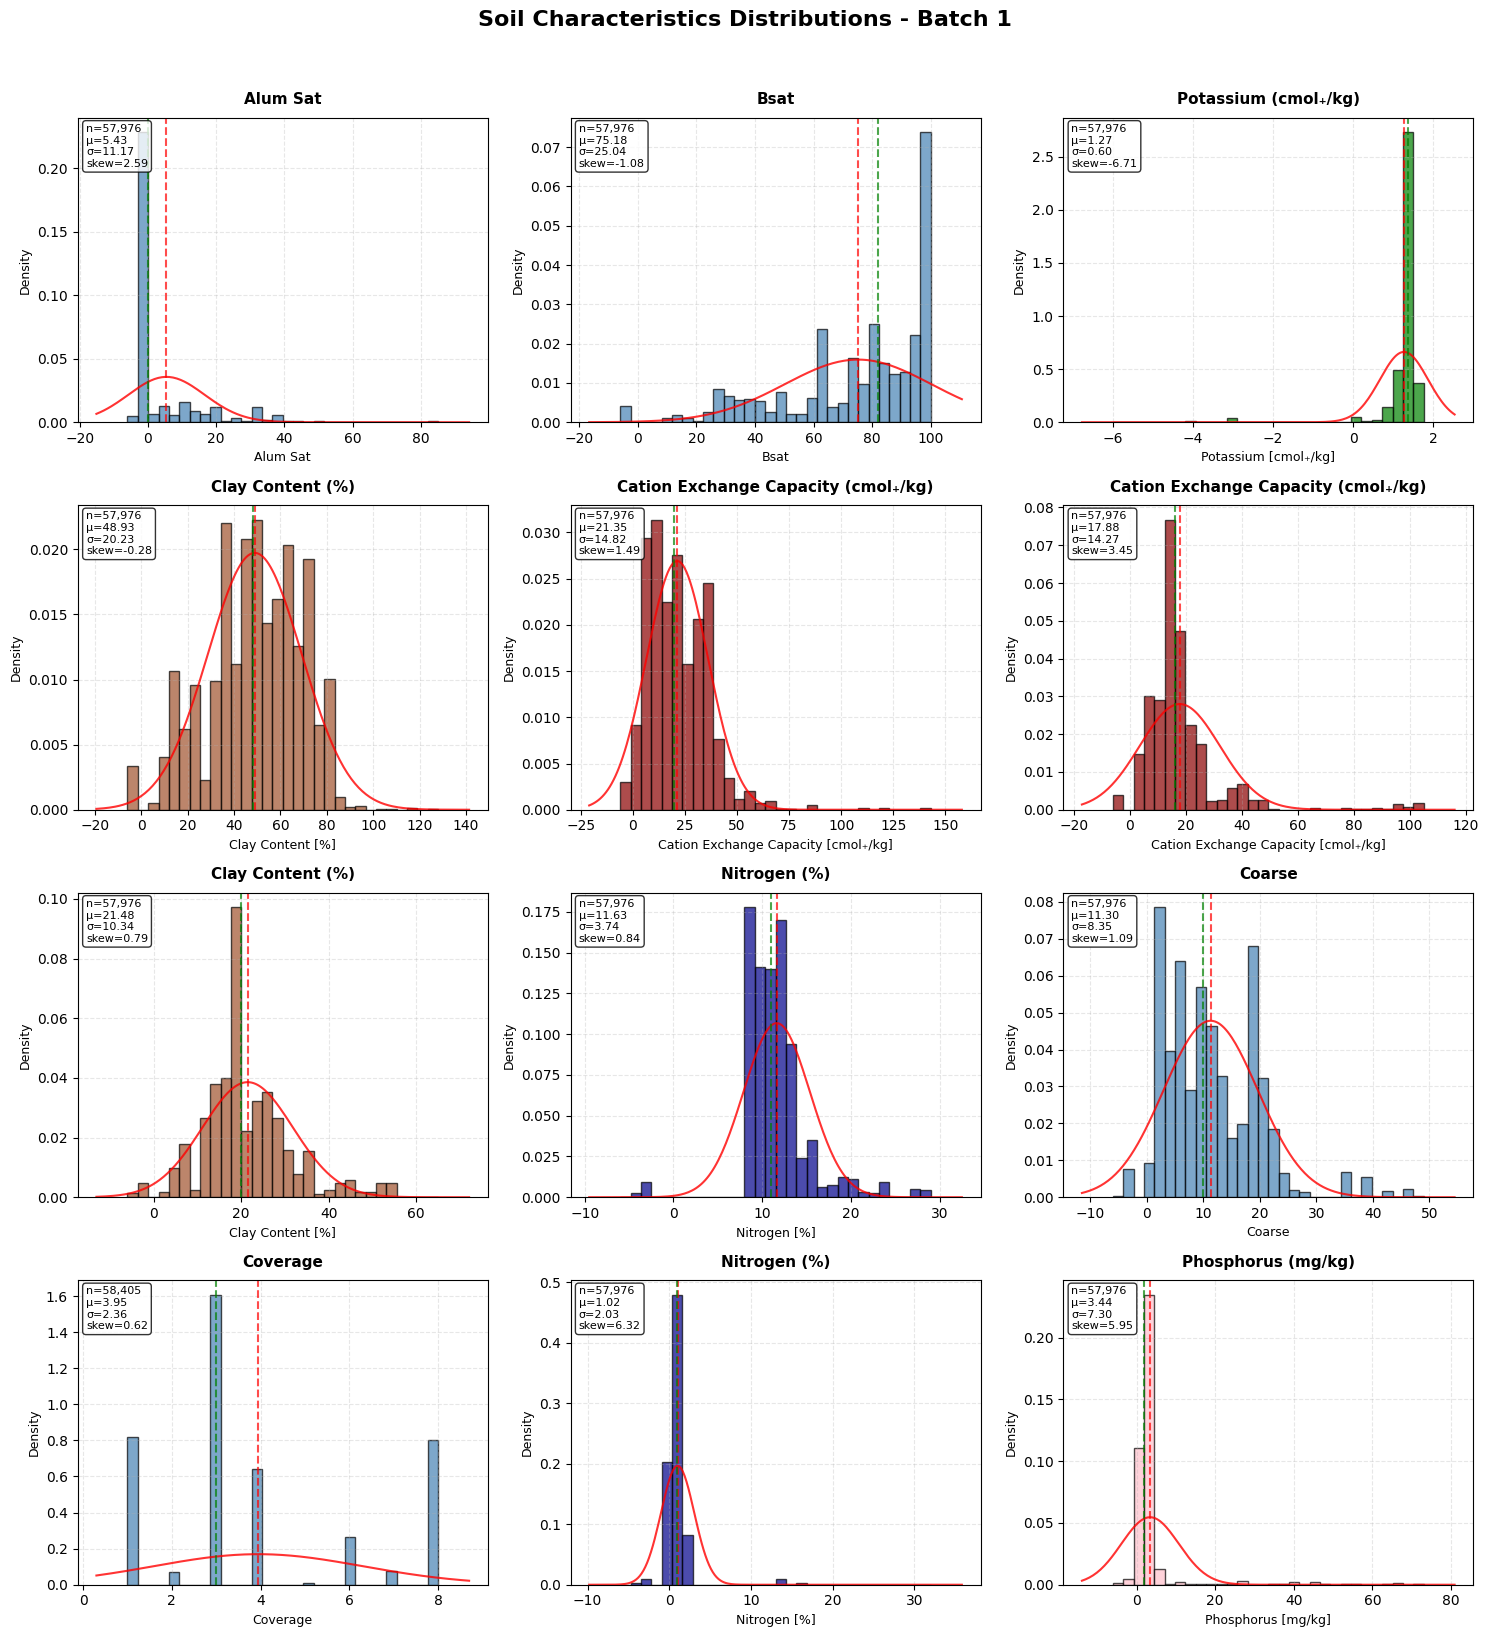


📊 Processing batch 2/2 (properties 13-24)...
✓ Batch 2 saved to: resources/soil_distributions/soil_distributions_batch_2.png


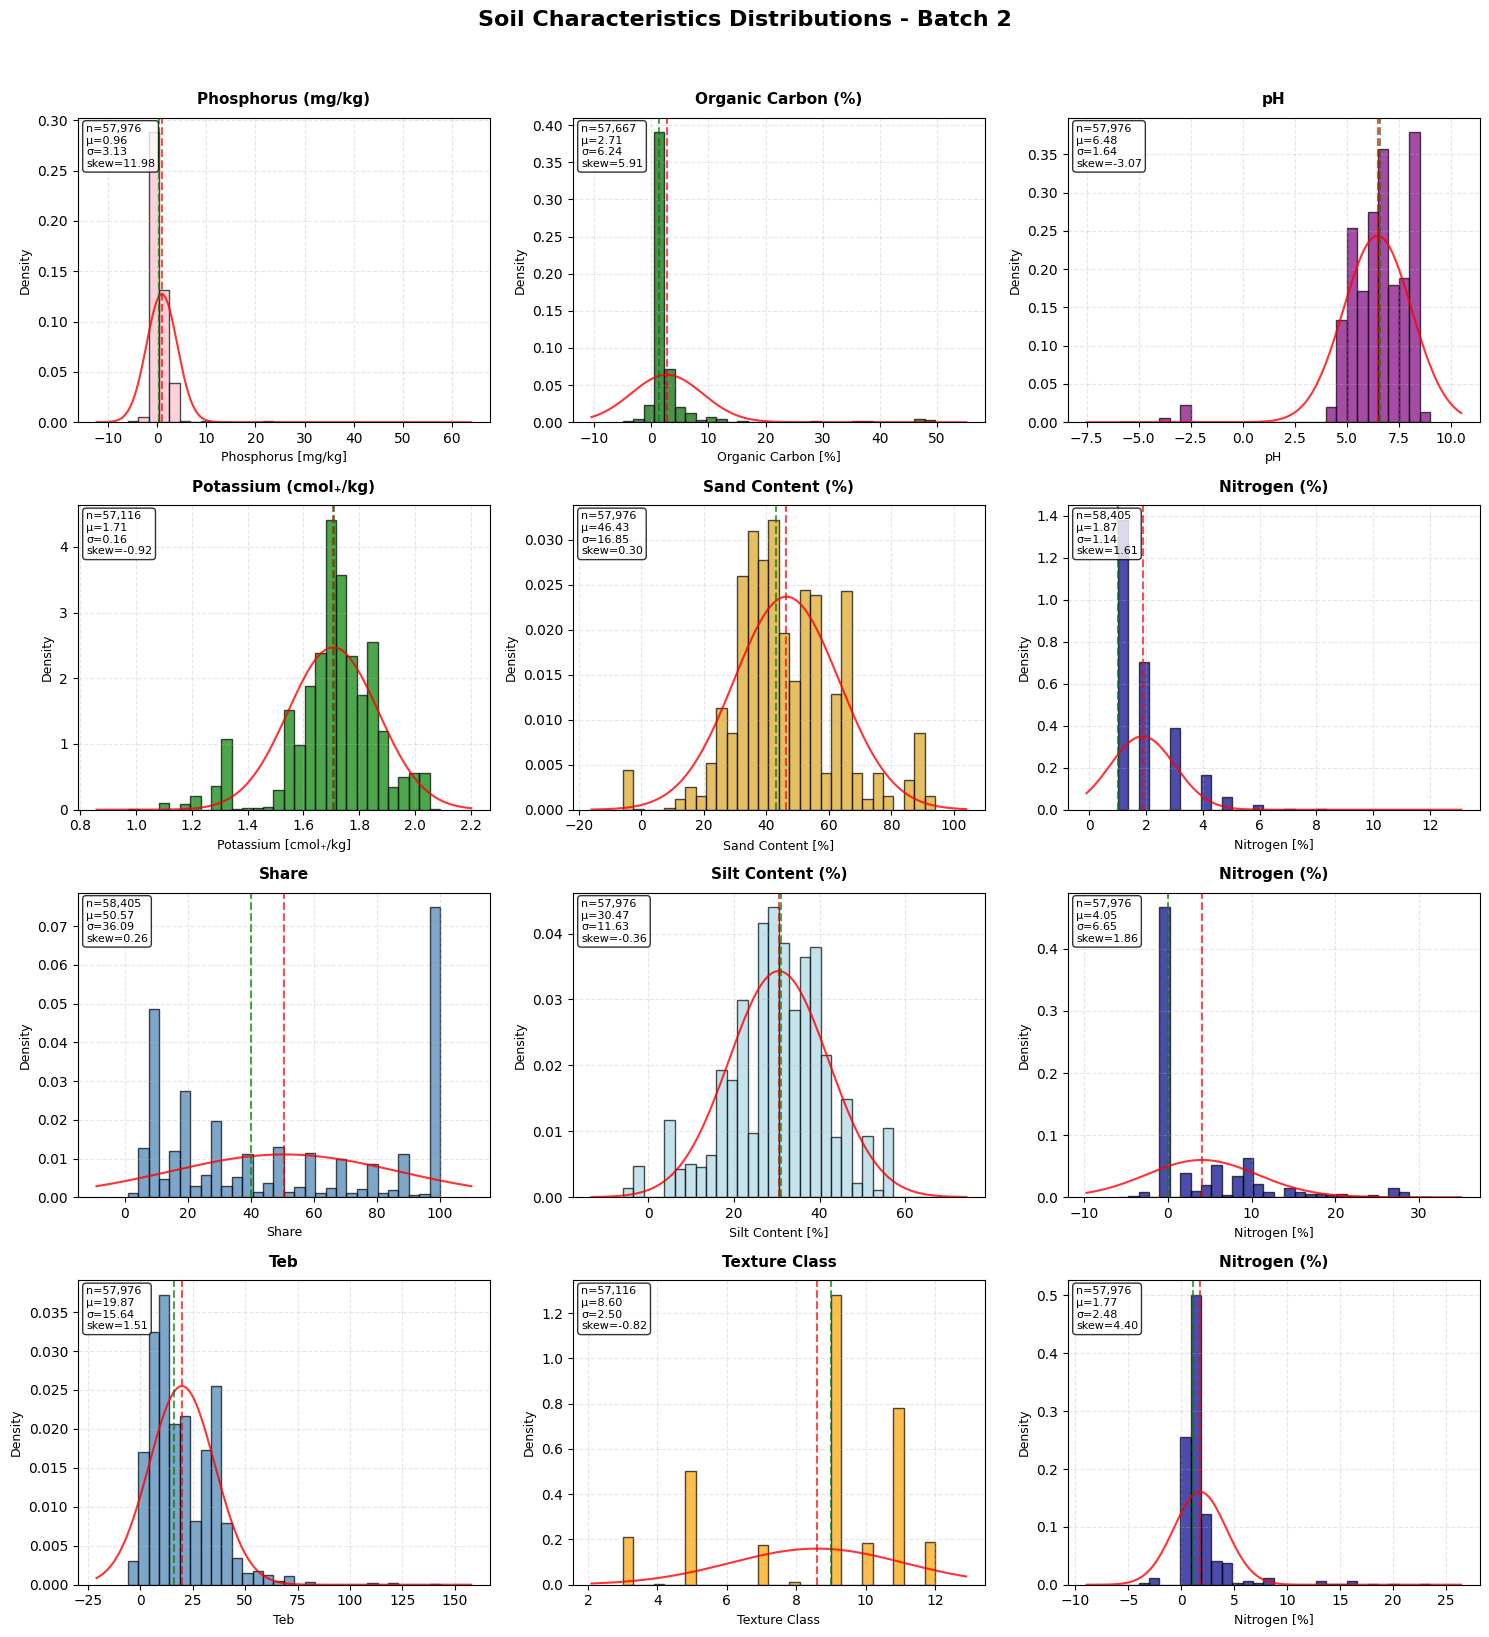


CATEGORICAL SOIL CHARACTERISTICS ANALYSIS

📊 Analyzing 1 categorical columns...
   📋 TEXTURE_SOTER: 58,405 samples, 5 unique categories
   ✓ TEXTURE_SOTER categorical plot saved


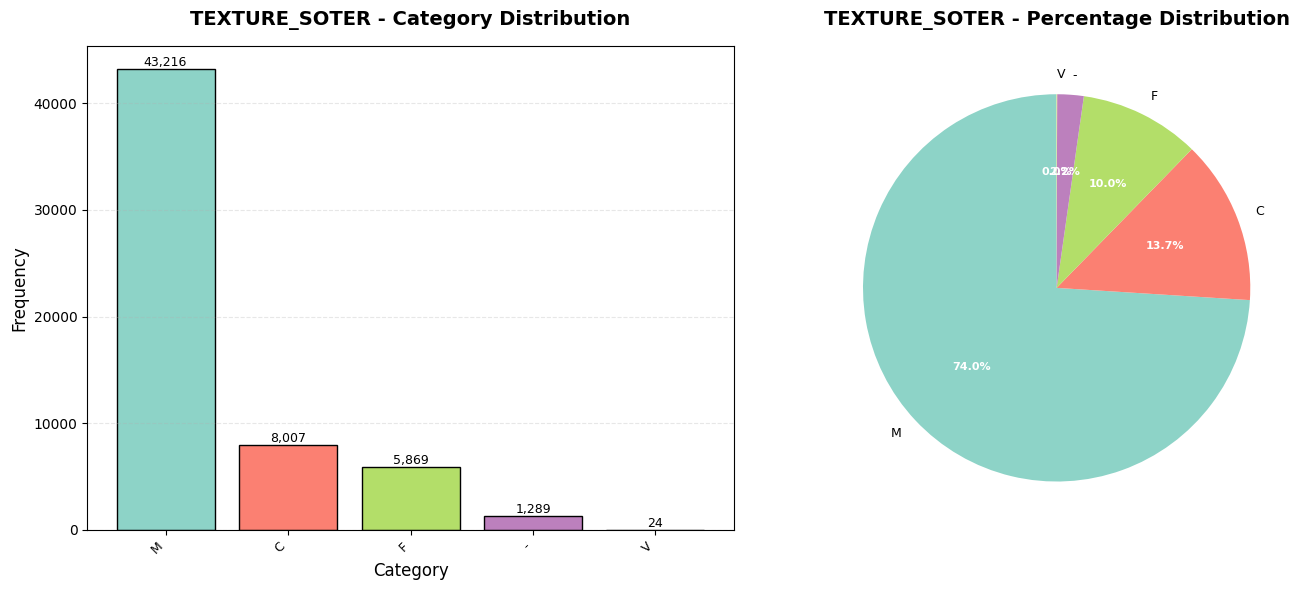

     Top 5 categories:
       1. M: 43,216 (74.0%)
       2. C: 8,007 (13.7%)
       3. F: 5,869 (10.0%)
       4. -: 1,289 (2.2%)
       5. V: 24 (0.0%)


NUMERIC SOIL CHARACTERISTICS SUMMARY STATISTICS

📊 SUMMARY STATISTICS TABLE:
Property                       Unit             Mean        Std     Skew      CV%    Samples
------------------------------------------------------------------------------------------------------------------------
Nitrogen                       %               1.872      1.142     1.61     61.0     58,405
Share                          -               50.57      36.09     0.26     71.4     58,405
Coverage                       -               3.947      2.356     0.62     59.7     58,405
Alum Sat                       -               5.427     11.166     2.59    205.7     57,976
Cation Exchange Capacity       cmol₊/kg        21.35      14.82     1.49     69.4     57,976
Bsat                           -               75.18      25.04    -1.08     33.3     57

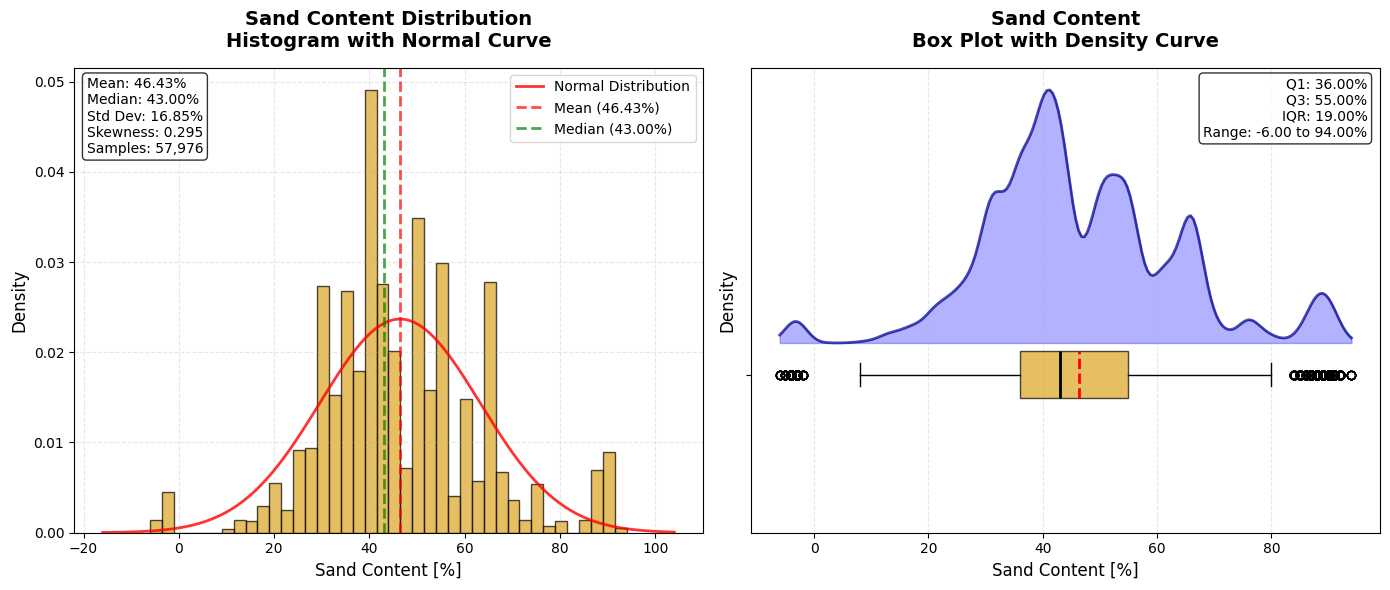

   📈 CLAY: 57,976 samples
   ✓ CLAY plot saved


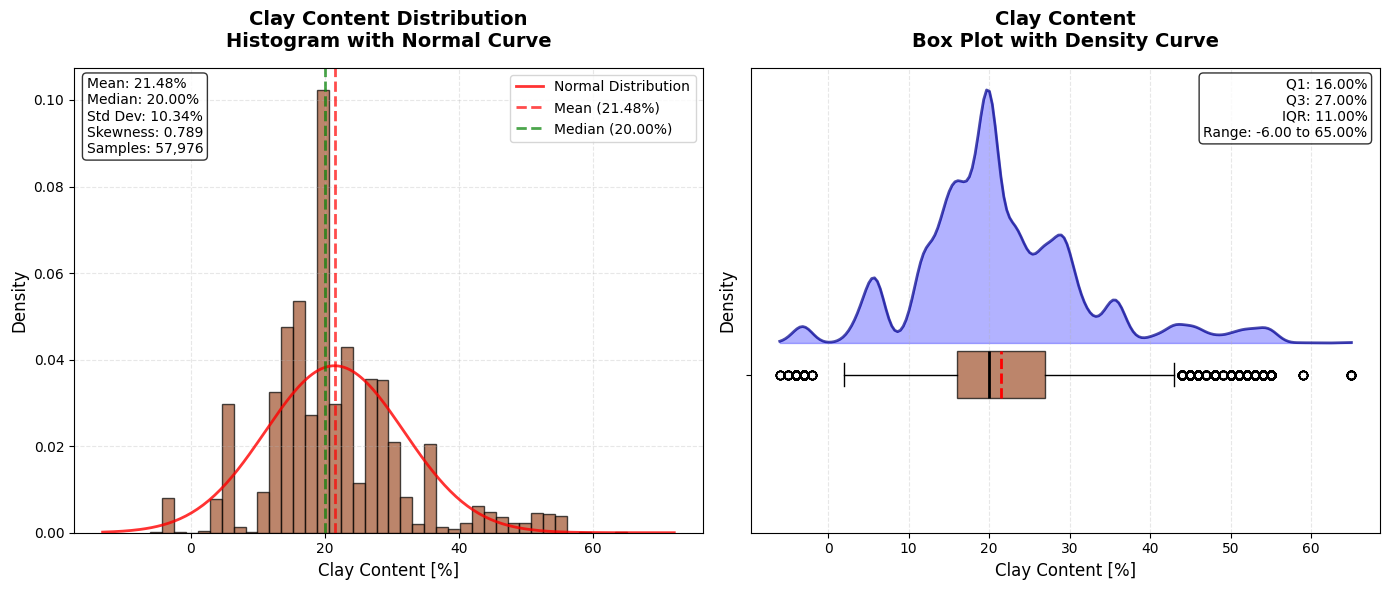

   📈 SILT: 57,976 samples
   ✓ SILT plot saved


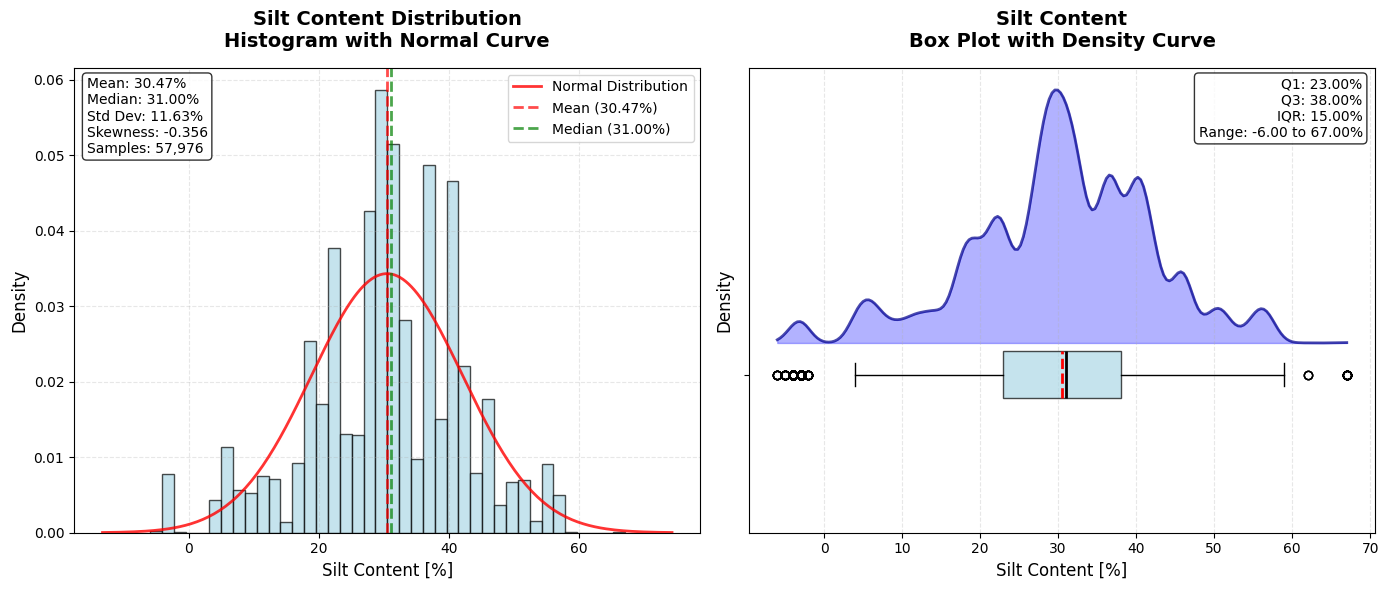

   📈 ORG_CARBON: 57,667 samples
   ✓ ORG_CARBON plot saved


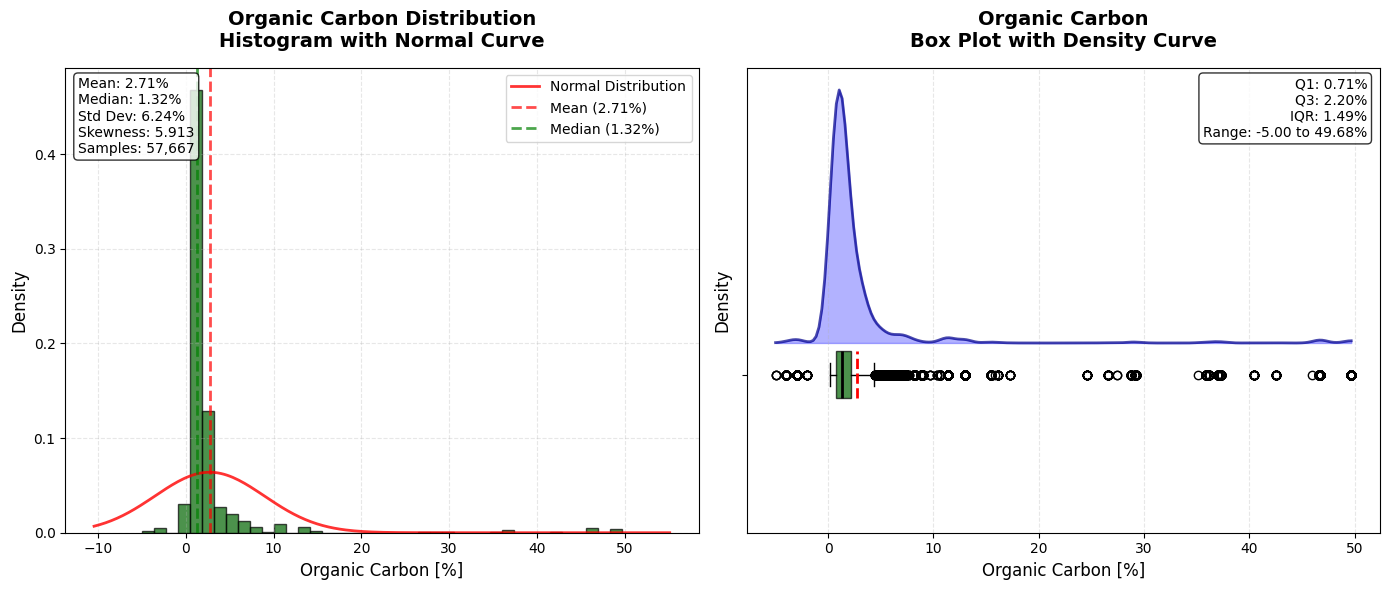


SOIL CHARACTERISTICS CORRELATION ANALYSIS

📊 Calculating correlations among 24 soil properties...
✓ Correlation matrix saved to: resources/soil_distributions/soil_correlation_matrix.png


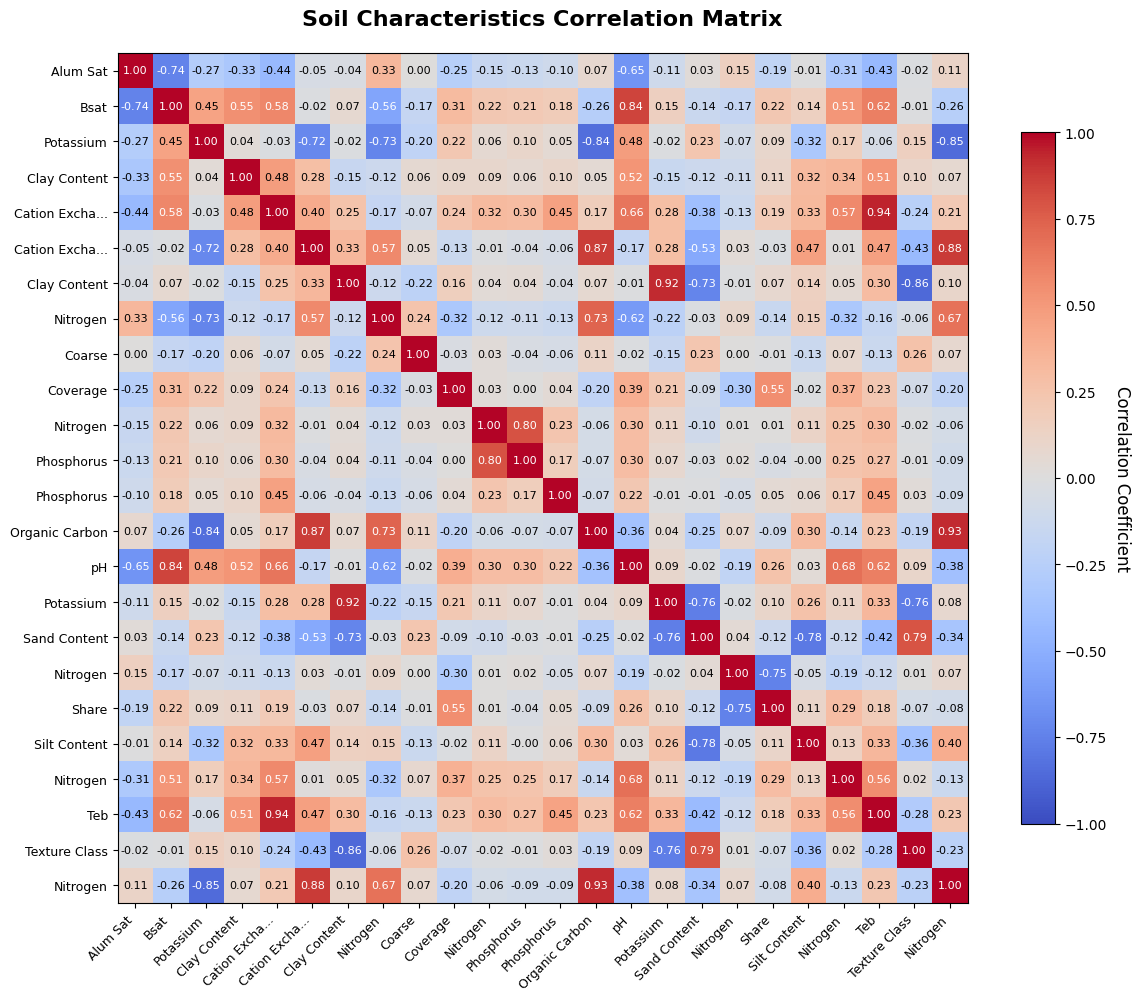


🔗 STRONG CORRELATIONS (|r| > 0.7):
   Alum Sat ↔ Bsat: r = -0.735 (negative)
   Bsat ↔ pH: r = 0.845 (positive)
   Potassium ↔ Cation Exchange Capacity: r = -0.717 (negative)
   Potassium ↔ Nitrogen: r = -0.729 (negative)
   Potassium ↔ Organic Carbon: r = -0.842 (negative)
   Potassium ↔ Nitrogen: r = -0.852 (negative)
   Cation Exchange Capacity ↔ Teb: r = 0.945 (positive)
   Cation Exchange Capacity ↔ Organic Carbon: r = 0.872 (positive)
   Cation Exchange Capacity ↔ Nitrogen: r = 0.880 (positive)
   Clay Content ↔ Potassium: r = 0.924 (positive)
   Clay Content ↔ Sand Content: r = -0.729 (negative)
   Clay Content ↔ Texture Class: r = -0.861 (negative)
   Nitrogen ↔ Organic Carbon: r = 0.734 (positive)
   Nitrogen ↔ Phosphorus: r = 0.804 (positive)
   Organic Carbon ↔ Nitrogen: r = 0.928 (positive)
   Potassium ↔ Sand Content: r = -0.760 (negative)
   Potassium ↔ Texture Class: r = -0.762 (negative)
   Sand Content ↔ Silt Content: r = -0.782 (negative)
   Sand Content ↔ Texture Cl

In [23]:
# ============================================================================
# COMPLETE SOIL CHARACTERISTICS DISTRIBUTION ANALYSIS
# (With proper handling of numeric and non-numeric data)
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import math
from scipy import stats
from collections import Counter
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("COMPLETE SOIL CHARACTERISTICS DISTRIBUTION ANALYSIS")
print("="*80)

# =======================================================
# DATA LOADING AND PREPARATION
# =======================================================
print("🔍 Loading and preparing data...")

# Try to find available dataframe
df_found = None
for df_name in ['df_soil', 'df_clean', 'df_d1', 'df_final', 'df_analysis', 'df']:
    if df_name in locals() or df_name in globals():
        df_found = eval(df_name)
        print(f"✓ Using dataframe: {df_name} (shape: {df_found.shape})")
        break

if df_found is None:
    print("⚠ No existing dataframe found, loading from CSV...")
    csv_path = "/run/media/swift/MISO_EFI/DATA/SOIL/processed/HWSD2_LAYERS_D1.csv"
    if os.path.exists(csv_path):
        df_found = pd.read_csv(csv_path)
        print(f"✓ Loaded data from: {csv_path}")
    else:
        print("❌ Could not find data. Please run data loading cells first.")
        exit()

# Clean sentinel values
print("\n🔧 Cleaning data...")
sentinels = [-9, -1, -99, -999, -9999, -99999]
df_clean = df_found.copy()

# Clean numeric columns only
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_clean[col] = df_clean[col].replace(sentinels, np.nan)

print(f"📊 Cleaned data shape: {df_clean.shape}")

# =======================================================
# HELPER FUNCTIONS
# =======================================================
def get_skewness_interpretation(skew):
    """Interpret skewness value"""
    if abs(skew) < 0.5:
        return "approximately symmetric"
    elif 0.5 <= skew < 1.0:
        return "moderately right-skewed"
    elif 1.0 <= skew < 2.0:
        return "strongly right-skewed"
    elif skew >= 2.0:
        return "heavily right-skewed"
    elif -1.0 < skew <= -0.5:
        return "moderately left-skewed"
    elif -2.0 < skew <= -1.0:
        return "strongly left-skewed"
    else:
        return "heavily left-skewed"

def get_variability_level(cv):
    """Interpret coefficient of variation"""
    if cv < 15:
        return "low variability"
    elif cv < 35:
        return "moderate variability"
    elif cv < 50:
        return "high variability"
    else:
        return "very high variability"

def get_soil_property_info(col_name):
    """Get display information for soil properties"""
    property_info = {
        'SAND': {'name': 'Sand Content', 'unit': '%', 'color': 'goldenrod'},
        'CLAY': {'name': 'Clay Content', 'unit': '%', 'color': 'sienna'},
        'SILT': {'name': 'Silt Content', 'unit': '%', 'color': 'lightblue'},
        'ORG_CARBON': {'name': 'Organic Carbon', 'unit': '%', 'color': 'darkgreen'},
        'PH': {'name': 'pH', 'unit': '', 'color': 'purple'},
        'CEC': {'name': 'Cation Exchange Capacity', 'unit': 'cmol₊/kg', 'color': 'darkred'},
        'BD': {'name': 'Bulk Density', 'unit': 'g/cm³', 'color': 'brown'},
        'GRAVEL': {'name': 'Gravel Content', 'unit': '%', 'color': 'gray'},
        'TEXTURE': {'name': 'Texture Class', 'unit': '', 'color': 'orange'},
        'WC': {'name': 'Water Content', 'unit': '%', 'color': 'blue'},
        'N': {'name': 'Nitrogen', 'unit': '%', 'color': 'darkblue'},
        'P': {'name': 'Phosphorus', 'unit': 'mg/kg', 'color': 'pink'},
        'K': {'name': 'Potassium', 'unit': 'cmol₊/kg', 'color': 'green'},
    }
    
    # Return info if available, otherwise use column name
    if col_name in property_info:
        return property_info[col_name]
    else:
        # Try to find partial match
        for key in property_info:
            if key in col_name or col_name in key:
                return property_info[key]
        
        # Default
        return {'name': col_name.replace('_', ' ').title(), 'unit': '', 'color': 'steelblue'}

def is_numeric_column(series, sample_size=100):
    """
    Check if a pandas Series can be converted to numeric.
    Returns True if at least 80% of non-null values are numeric.
    """
    if series.dtype in [np.float64, np.float32, np.int64, np.int32]:
        return True
    
    # Sample data if too large
    if len(series) > sample_size:
        sample = series.dropna().sample(n=min(sample_size, len(series.dropna())))
    else:
        sample = series.dropna()
    
    if len(sample) == 0:
        return False
    
    numeric_count = 0
    total_count = len(sample)
    
    for val in sample:
        try:
            # Try to convert to float
            float(val)
            numeric_count += 1
        except (ValueError, TypeError):
            continue
    
    # If at least 80% are numeric, consider it a numeric column
    return (numeric_count / total_count) >= 0.8

def convert_to_numeric(series):
    """Convert series to numeric, coercing errors to NaN"""
    return pd.to_numeric(series, errors='coerce')

# =======================================================
# IDENTIFY SOIL CHARACTERISTICS
# =======================================================
print("\n🔍 Identifying soil characteristics...")

# Common soil property columns (case-insensitive search)
soil_properties = []
common_properties = ['SAND', 'CLAY', 'SILT', 'ORG_CARBON', 'PH', 'CEC', 'BD', 
                     'GRAVEL', 'TEXTURE', 'WC', 'WATER', 'NITROGEN', 'PHOSPHORUS',
                     'POTASSIUM', 'K', 'N', 'P', 'CARBON', 'ORGANIC', 'DENSITY']

for col in df_clean.columns:
    col_upper = col.upper()
    # Check if column name contains any soil property keyword
    for prop in common_properties:
        if prop in col_upper:
            soil_properties.append(col)
            break

# Also include any numeric columns with meaningful data
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    if col not in soil_properties:
        # Check if it's likely a soil property (not ID, coordinate, or code)
        if not any(x in col.upper() for x in ['ID', 'LAT', 'LON', 'CODE', 'INDEX', 'FLAG']):
            soil_properties.append(col)

# Remove duplicates and sort
soil_properties = sorted(list(set(soil_properties)))

print(f"📊 Found {len(soil_properties)} potential soil characteristics")

# =======================================================
# CLASSIFY COLUMNS BY DATA TYPE
# =======================================================
print("\n🔍 Classifying columns by data type...")

numeric_columns = []
categorical_columns = []
problematic_columns = []

for col in soil_properties:
    if col in df_clean.columns:
        # Check if already numeric dtype
        if df_clean[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
            numeric_columns.append(col)
        else:
            # Test if it can be numeric
            if is_numeric_column(df_clean[col]):
                numeric_columns.append(col)
            else:
                # Check if it's categorical (text with limited unique values)
                unique_vals = df_clean[col].dropna().nunique()
                if unique_vals < 50:  # Arbitrary threshold for categorical
                    categorical_columns.append(col)
                else:
                    problematic_columns.append(col)

print(f"📊 Classification Results:")
print(f"   ✅ Numeric columns: {len(numeric_columns)}")
print(f"   📋 Categorical columns: {len(categorical_columns)}")
print(f"   ⚠ Problematic columns: {len(problematic_columns)}")

# Show examples
if numeric_columns:
    print(f"\n📈 Top Numeric Columns:")
    for i, col in enumerate(numeric_columns[:10]):
        info = get_soil_property_info(col)
        print(f"   {i+1:2d}. {col:20s} → {info['name']}")

if categorical_columns:
    print(f"\n📊 Top Categorical Columns:")
    for i, col in enumerate(categorical_columns[:10]):
        unique_count = df_clean[col].dropna().nunique()
        print(f"   {i+1:2d}. {col:20s} → {unique_count} unique values")

# =======================================================
# CREATE DISTRIBUTION PLOTS FOR NUMERIC CHARACTERISTICS
# =======================================================
print("\n" + "="*80)
print("CREATING DISTRIBUTION PLOTS FOR NUMERIC SOIL CHARACTERISTICS")
print("="*80)

# Create output directory
output_dir = "resources/soil_distributions"
os.makedirs(output_dir, exist_ok=True)

# Statistics storage
all_stats = []

# Plot in batches to avoid memory issues
batch_size = 12  # Number of plots per figure
n_batches = math.ceil(len(numeric_columns) / batch_size)

for batch_num in range(n_batches):
    start_idx = batch_num * batch_size
    end_idx = min((batch_num + 1) * batch_size, len(numeric_columns))
    batch_properties = numeric_columns[start_idx:end_idx]
    
    if not batch_properties:
        continue
    
    print(f"\n📊 Processing batch {batch_num+1}/{n_batches} (properties {start_idx+1}-{end_idx})...")
    
    # Calculate grid dimensions
    n_plots = len(batch_properties)
    n_cols = min(3, n_plots)
    n_rows = math.ceil(n_plots / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    fig.suptitle(f'Soil Characteristics Distributions - Batch {batch_num+1}', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    # Flatten axes array for easy indexing
    if n_plots > 1:
        if n_rows == 1:
            axes_flat = axes
        else:
            axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
    
    for idx, prop in enumerate(batch_properties):
        ax = axes_flat[idx]
        
        # Get data and ensure it's numeric
        data_series = df_clean[prop]
        
        # Convert to numeric if needed
        if data_series.dtype not in [np.float64, np.float32, np.int64, np.int32]:
            data_series = convert_to_numeric(data_series)
        
        data = data_series.dropna()
        
        if len(data) < 10:
            ax.text(0.5, 0.5, f'Insufficient data\n({len(data)} samples)', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"{prop}\n(n={len(data)})", fontsize=10)
            continue
        
        # Get property info
        info = get_soil_property_info(prop)
        prop_name = info['name']
        unit = info['unit']
        color = info['color']
        
        # Calculate statistics
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        skew_val = data.skew()
        kurtosis_val = data.kurtosis()
        cv_val = (std_val / mean_val * 100) if mean_val != 0 else 0
        n_samples = len(data)
        
        # Store statistics
        all_stats.append({
            'Property': prop,
            'Display Name': prop_name,
            'Unit': unit,
            'Mean': mean_val,
            'Median': median_val,
            'Std': std_val,
            'Skewness': skew_val,
            'Kurtosis': kurtosis_val,
            'CV (%)': cv_val,
            'Samples': n_samples,
            'Min': data.min(),
            'Max': data.max(),
            'Q1': data.quantile(0.25),
            'Q3': data.quantile(0.75)
        })
        
        # Create histogram
        n_bins = min(30, int(n_samples / 50))
        n_bins = max(n_bins, 10)  # At least 10 bins
        
        ax.hist(data, bins=n_bins, alpha=0.7, color=color, 
                edgecolor='black', density=True)
        
        # Add normal distribution curve
        if std_val > 0:
            x_min, x_max = data.min(), data.max()
            x_range = x_max - x_min
            x = np.linspace(x_min - 0.1*x_range, x_max + 0.1*x_range, 200)
            normal_pdf = stats.norm.pdf(x, mean_val, std_val)
            ax.plot(x, normal_pdf, 'r-', linewidth=1.5, alpha=0.8, label='Normal')
        
        # Add vertical lines
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
        
        # Set title and labels
        title = f"{prop_name}"
        if unit:
            title += f" ({unit})"
        ax.set_title(title, fontsize=11, fontweight='bold', pad=10)
        
        # Format x-axis label
        xlabel = prop_name
        if unit:
            xlabel += f" [{unit}]"
        ax.set_xlabel(xlabel, fontsize=9)
        ax.set_ylabel('Density', fontsize=9)
        
        # Add statistics text
        stats_text = f"n={n_samples:,}\n"
        stats_text += f"μ={mean_val:.2f}\n"
        stats_text += f"σ={std_val:.2f}\n"
        stats_text += f"skew={skew_val:.2f}"
        
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add grid
        ax.grid(True, alpha=0.3, linestyle='--')
    
    # Hide unused subplots
    for idx in range(len(batch_properties), len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    
    # Save figure
    batch_output = os.path.join(output_dir, f"soil_distributions_batch_{batch_num+1}.png")
    plt.savefig(batch_output, dpi=300, bbox_inches='tight')
    print(f"✓ Batch {batch_num+1} saved to: {batch_output}")
    
    # Show figure
    plt.show()

# =======================================================
# CREATE CATEGORICAL DATA ANALYSIS
# =======================================================
print("\n" + "="*80)
print("CATEGORICAL SOIL CHARACTERISTICS ANALYSIS")
print("="*80)

if categorical_columns:
    # Create output directory for categorical plots
    cat_output_dir = os.path.join(output_dir, "categorical")
    os.makedirs(cat_output_dir, exist_ok=True)
    
    print(f"\n📊 Analyzing {len(categorical_columns)} categorical columns...")
    
    for prop in categorical_columns[:20]:  # Limit to first 20 to avoid too many plots
        data = df_clean[prop].dropna()
        
        if len(data) < 10:
            print(f"   ⚠ {prop}: Insufficient data ({len(data)} samples)")
            continue
        
        unique_count = data.nunique()
        print(f"   📋 {prop}: {len(data):,} samples, {unique_count} unique categories")
        
        if unique_count > 30:  # Too many categories for meaningful plot
            print(f"     ⚠ Too many categories ({unique_count}), skipping detailed plot")
            continue
        
        # Create bar plot for categorical data
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Count frequencies
        value_counts = data.value_counts()
        
        # LEFT: Bar plot
        colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
        bars = ax1.bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black')
        
        ax1.set_title(f'{prop} - Category Distribution', fontsize=14, fontweight='bold', pad=15)
        ax1.set_xlabel('Category', fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)
        ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        # Add value labels on bars
        for bar, count in zip(bars, value_counts.values):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{count:,}', ha='center', va='bottom', fontsize=9)
        
        # Set x-ticks with category names (truncated if too long)
        tick_labels = []
        for label in value_counts.index:
            if isinstance(label, str) and len(label) > 15:
                tick_labels.append(label[:12] + '...')
            else:
                tick_labels.append(str(label))
        
        ax1.set_xticks(range(len(value_counts)))
        ax1.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=9)
        
        # RIGHT: Pie chart (only if reasonable number of categories)
        if len(value_counts) <= 15:
            # Get top categories
            if len(value_counts) > 8:
                # Combine small categories into "Other"
                top_values = value_counts.head(7)
                other_count = value_counts[7:].sum()
                pie_data = pd.concat([top_values, pd.Series({'Other': other_count})])
                pie_labels = list(top_values.index) + ['Other']
            else:
                pie_data = value_counts
                pie_labels = value_counts.index
            
            wedges, texts, autotexts = ax2.pie(pie_data.values, labels=pie_labels, autopct='%1.1f%%',
                                              startangle=90, colors=colors[:len(pie_data)])
            
            # Improve text appearance
            for text in texts:
                text.set_fontsize(9)
            for autotext in autotexts:
                autotext.set_fontsize(8)
                autotext.set_color('white')
                autotext.set_fontweight('bold')
            
            ax2.set_title(f'{prop} - Percentage Distribution', fontsize=14, fontweight='bold', pad=15)
        else:
            ax2.text(0.5, 0.5, 'Too many categories\nfor pie chart', 
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
            ax2.set_title(f'{prop}', fontsize=14, fontweight='bold', pad=15)
        
        plt.tight_layout()
        
        # Save categorical plot
        output_path = os.path.join(cat_output_dir, f"categorical_{prop}.png")
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"   ✓ {prop} categorical plot saved")
        
        plt.show()
        
        # Print summary for this categorical variable
        print(f"     Top 5 categories:")
        for i, (value, count) in enumerate(value_counts.head(5).items()):
            percentage = (count / len(data)) * 100
            print(f"       {i+1}. {value}: {count:,} ({percentage:.1f}%)")
        
        print()
else:
    print("No categorical columns found to analyze.")

# =======================================================
# CREATE SUMMARY STATISTICS TABLE
# =======================================================
print("\n" + "="*80)
print("NUMERIC SOIL CHARACTERISTICS SUMMARY STATISTICS")
print("="*80)

# Convert stats to DataFrame
if all_stats:
    stats_df = pd.DataFrame(all_stats)
    
    # Sort by number of samples (descending)
    stats_df = stats_df.sort_values('Samples', ascending=False)
    
    # Display summary table
    print("\n📊 SUMMARY STATISTICS TABLE:")
    print("=" * 120)
    print(f"{'Property':30s} {'Unit':10s} {'Mean':>10s} {'Std':>10s} {'Skew':>8s} {'CV%':>8s} {'Samples':>10s}")
    print("-" * 120)
    
    for _, row in stats_df.iterrows():
        prop_display = row['Display Name']
        if len(prop_display) > 28:
            prop_display = prop_display[:25] + "..."
        
        unit_display = row['Unit'] if row['Unit'] else "-"
        
        # Format values based on magnitude
        mean_val = row['Mean']
        std_val = row['Std']
        
        if abs(mean_val) >= 1000:
            mean_fmt = f"{mean_val:.0f}"
            std_fmt = f"{std_val:.0f}"
        elif abs(mean_val) >= 100:
            mean_fmt = f"{mean_val:.1f}"
            std_fmt = f"{std_val:.1f}"
        elif abs(mean_val) >= 10:
            mean_fmt = f"{mean_val:.2f}"
            std_fmt = f"{std_val:.2f}"
        elif abs(mean_val) >= 1:
            mean_fmt = f"{mean_val:.3f}"
            std_fmt = f"{std_val:.3f}"
        else:
            mean_fmt = f"{mean_val:.4f}"
            std_fmt = f"{std_val:.4f}"
        
        print(f"{prop_display:30s} {unit_display:10s} {mean_fmt:>10s} {std_fmt:>10s} "
              f"{row['Skewness']:>8.2f} {row['CV (%)']:>8.1f} {row['Samples']:>10,}")
    
    print("=" * 120)
    
    # Save statistics to CSV
    stats_csv = os.path.join(output_dir, "soil_statistics_summary.csv")
    stats_df.to_csv(stats_csv, index=False)
    print(f"\n✓ Statistics saved to: {stats_csv}")

# =======================================================
# CREATE KEY CHARACTERISTICS INDIVIDUAL PLOTS
# =======================================================
print("\n" + "="*80)
print("KEY SOIL CHARACTERISTICS: INDIVIDUAL DISTRIBUTION PLOTS")
print("="*80)

# Define key soil characteristics for detailed analysis
key_properties = ['SAND', 'CLAY', 'SILT', 'ORG_CARBON', 'PH', 'CEC', 'BD']

# Check which key properties exist in the data
available_key_props = []
for prop in key_properties:
    if prop in df_clean.columns:
        # Check if it's numeric or can be converted
        if prop in numeric_columns:
            available_key_props.append(prop)
        else:
            # Try to convert
            converted = convert_to_numeric(df_clean[prop]).dropna()
            if len(converted) >= 100:
                available_key_props.append(prop)
                # Update the data in df_clean for consistency
                df_clean[prop] = converted

print(f"\n📊 Creating individual plots for {len(available_key_props)} key properties:")

for prop in available_key_props:
    # Get data and ensure numeric
    data_series = df_clean[prop]
    if data_series.dtype not in [np.float64, np.float32, np.int64, np.int32]:
        data_series = convert_to_numeric(data_series)
    
    data = data_series.dropna()
    
    if len(data) < 100:
        print(f"   ⚠ {prop}: Insufficient data ({len(data)} samples)")
        continue
    
    print(f"   📈 {prop}: {len(data):,} samples")
    
    # Create individual plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Get property info
    info = get_soil_property_info(prop)
    prop_name = info['name']
    unit = info['unit']
    color = info['color']
    
    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skew_val = data.skew()
    n_samples = len(data)
    
    # LEFT SUBPLOT: Histogram with normal curve
    n_bins = min(40, int(n_samples / 100))
    n_bins = max(n_bins, 15)
    
    ax1.hist(data, bins=n_bins, alpha=0.7, color=color, 
             edgecolor='black', density=True)
    
    # Add normal distribution curve
    if std_val > 0:
        x_min, x_max = data.min(), data.max()
        x_range = x_max - x_min
        x = np.linspace(x_min - 0.1*x_range, x_max + 0.1*x_range, 200)
        normal_pdf = stats.norm.pdf(x, mean_val, std_val)
        ax1.plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')
    
    # Add vertical lines
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                alpha=0.7, label=f'Mean ({mean_val:.2f}{unit})')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, 
                alpha=0.7, label=f'Median ({median_val:.2f}{unit})')
    
    ax1.set_title(f'{prop_name} Distribution\nHistogram with Normal Curve', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel(f'{prop_name} [{unit}]' if unit else prop_name, fontsize=12)
    ax1.set_ylabel('Density', fontsize=12)
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # Add statistics box
    stats_text = f'Mean: {mean_val:.2f}{unit}\n'
    stats_text += f'Median: {median_val:.2f}{unit}\n'
    stats_text += f'Std Dev: {std_val:.2f}{unit}\n'
    stats_text += f'Skewness: {skew_val:.3f}\n'
    stats_text += f'Samples: {n_samples:,}'
    
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # RIGHT SUBPLOT: Box plot and density
    # Create box plot
    bp = ax2.boxplot(data, vert=False, patch_artist=True, 
                     showmeans=True, meanline=True)
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    bp['medians'][0].set_color('black')
    bp['medians'][0].set_linewidth(2)
    bp['means'][0].set_color('red')
    bp['means'][0].set_linewidth(2)
    
    # Add density plot on top
    density = stats.gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    y_vals = density(x_vals)
    
    # Scale density to fit within box plot
    y_vals_scaled = y_vals / y_vals.max() * 0.8 + 1.1
    ax2.plot(x_vals, y_vals_scaled, color='darkblue', linewidth=2, alpha=0.7)
    
    # Fill under density curve
    ax2.fill_between(x_vals, 1.1, y_vals_scaled, alpha=0.3, color='blue')
    
    ax2.set_title(f'{prop_name}\nBox Plot with Density Curve', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel(f'{prop_name} [{unit}]' if unit else prop_name, fontsize=12)
    ax2.set_ylabel('Density', fontsize=12)
    ax2.set_yticks([1])
    ax2.set_yticklabels([''])
    ax2.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    # Add quartile information
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    quartile_text = f'Q1: {q1:.2f}{unit}\n'
    quartile_text += f'Q3: {q3:.2f}{unit}\n'
    quartile_text += f'IQR: {iqr:.2f}{unit}\n'
    quartile_text += f'Range: {data.min():.2f} to {data.max():.2f}{unit}'
    
    ax2.text(0.98, 0.98, quartile_text, transform=ax2.transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    # Save individual plot
    output_path = os.path.join(output_dir, f"soil_{prop.lower()}_distribution.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"   ✓ {prop} plot saved")
    
    plt.show()

# =======================================================
# CREATE CORRELATION MATRIX (if multiple properties)
# =======================================================
print("\n" + "="*80)
print("SOIL CHARACTERISTICS CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns with sufficient data
valid_cols = []
for col in numeric_columns:
    if col in df_clean.columns:
        # Convert to numeric if not already
        data_series = df_clean[col]
        if data_series.dtype not in [np.float64, np.float32, np.int64, np.int32]:
            data_series = convert_to_numeric(data_series)
        
        data = data_series.dropna()
        if len(data) >= 100:  # Minimum samples for correlation
            # Update df_clean with numeric version
            df_clean[col] = data_series
            valid_cols.append(col)

if len(valid_cols) >= 3:  # Need at least 3 variables for meaningful correlation matrix
    print(f"\n📊 Calculating correlations among {len(valid_cols)} soil properties...")
    
    # Create correlation matrix
    # Ensure all columns are numeric
    corr_data = df_clean[valid_cols].copy()
    for col in valid_cols:
        if corr_data[col].dtype not in [np.float64, np.float32, np.int64, np.int32]:
            corr_data[col] = convert_to_numeric(corr_data[col])
    
    corr_data = corr_data.dropna()
    
    if len(corr_data) >= 100:
        corr_matrix = corr_data.corr()
        
        # Plot correlation matrix
        fig, ax = plt.subplots(figsize=(12, 10))
        
        # Create heatmap
        im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        
        # Set ticks and labels
        ax.set_xticks(np.arange(len(valid_cols)))
        ax.set_yticks(np.arange(len(valid_cols)))
        
        # Shorten column names for display
        short_names = []
        for col in valid_cols:
            info = get_soil_property_info(col)
            short_name = info['name']
            if len(short_name) > 15:
                short_name = short_name[:12] + "..."
            short_names.append(short_name)
        
        ax.set_xticklabels(short_names, rotation=45, ha='right', fontsize=9)
        ax.set_yticklabels(short_names, fontsize=9)
        
        # Add colorbar
        cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
        cbar.ax.set_ylabel('Correlation Coefficient', rotation=-90, va="bottom", fontsize=12)
        
        # Add correlation values (only show if cell is large enough)
        for i in range(len(valid_cols)):
            for j in range(len(valid_cols)):
                text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", 
                              color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black",
                              fontsize=8)
        
        ax.set_title('Soil Characteristics Correlation Matrix', 
                    fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        
        # Save correlation matrix
        corr_output = os.path.join(output_dir, "soil_correlation_matrix.png")
        plt.savefig(corr_output, dpi=300, bbox_inches='tight')
        print(f"✓ Correlation matrix saved to: {corr_output}")
        
        # Save correlation data
        corr_csv = os.path.join(output_dir, "soil_correlation_matrix.csv")
        corr_matrix.to_csv(corr_csv)
        
        plt.show()
        
        # Identify strong correlations
        print("\n🔗 STRONG CORRELATIONS (|r| > 0.7):")
        strong_corrs = []
        for i in range(len(valid_cols)):
            for j in range(i+1, len(valid_cols)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    strong_corrs.append((valid_cols[i], valid_cols[j], corr_val))
        
        if strong_corrs:
            for var1, var2, corr_val in strong_corrs:
                info1 = get_soil_property_info(var1)
                info2 = get_soil_property_info(var2)
                direction = "positive" if corr_val > 0 else "negative"
                print(f"   {info1['name']} ↔ {info2['name']}: r = {corr_val:.3f} ({direction})")
        else:
            print("   No strong correlations found (|r| > 0.7)")
else:
    print("⚠ Insufficient data for correlation analysis (need at least 3 variables with ≥100 samples each)")

# =======================================================
# DATA QUALITY REPORT
# =======================================================
print("\n" + "="*80)
print("DATA QUALITY REPORT")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   Total columns: {len(df_clean.columns)}")
print(f"   Total rows: {len(df_clean):,}")

print(f"\n📈 DATA TYPE DISTRIBUTION:")
dtype_counts = df_clean.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    percentage = (count / len(df_clean.columns)) * 100
    print(f"   {dtype}: {count} columns ({percentage:.1f}%)")

print(f"\n🔍 MISSING DATA ANALYSIS:")
missing_per_col = df_clean.isnull().sum() / len(df_clean) * 100
print(f"   Columns with >50% missing: {(missing_per_col > 50).sum()}")
print(f"   Columns with >20% missing: {(missing_per_col > 20).sum()}")
print(f"   Columns with <5% missing: {(missing_per_col < 5).sum()}")

if missing_per_col.max() > 0:
    print(f"\n   Top 10 columns with most missing data:")
    top_missing = missing_per_col.sort_values(ascending=False).head(10)
    for col, pct in top_missing.items():
        print(f"     {col}: {pct:.1f}% missing")

print(f"\n📋 COLUMN CATEGORIES:")
print(f"   Numeric columns for analysis: {len(numeric_columns)}")
print(f"   Categorical columns: {len(categorical_columns)}")
print(f"   Problematic columns: {len(problematic_columns)}")

# =======================================================
# FINAL SUMMARY
# =======================================================
print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

print(f"\n✅ SUMMARY OF GENERATED OUTPUT:")
print(f"   📁 Output directory: {output_dir}")
print(f"   📊 Total soil characteristics analyzed: {len(soil_properties)}")
print(f"   📈 Distribution plots: {n_batches} batch files")
print(f"   📋 Statistics summary: soil_statistics_summary.csv")

if len(available_key_props) > 0:
    print(f"   🎯 Key property individual plots: {len(available_key_props)} files")

if categorical_columns:
    print(f"   📊 Categorical analysis: {len(categorical_columns)} categorical plots")

# Show top 10 properties by sample count
if all_stats:
    print(f"\n📊 TOP 10 NUMERIC PROPERTIES BY SAMPLE COUNT:")
    print("-" * 70)
    
    top_stats = sorted(all_stats, key=lambda x: x['Samples'], reverse=True)[:10]
    for i, stat in enumerate(top_stats):
        info = get_soil_property_info(stat['Property'])
        skew_interpretation = get_skewness_interpretation(stat['Skewness'])
        cv_interpretation = get_variability_level(stat['CV (%)'])
        
        print(f"   {i+1:2d}. {info['name']:25s}")
        print(f"        Samples: {stat['Samples']:,} | Mean: {stat['Mean']:.2f}{info['unit']} | "
              f"Skew: {stat['Skewness']:.2f} ({skew_interpretation})")
        print(f"        CV: {stat['CV (%)']:.1f}% ({cv_interpretation})")
        print()

print("\n" + "="*80)
print("🎯 RECOMMENDATIONS:")
print("="*80)
print("1. Review problematic columns - these contain non-numeric text data")
print("2. Consider encoding categorical variables for further analysis")
print("3. Check soil_statistics_summary.csv for detailed statistics")
print("4. Use correlation matrix to identify relationships between soil properties")
print("5. Consider data transformations for heavily skewed variables")
print("="*80)

# Save the updated dataframe with numeric conversions
output_df_path = os.path.join(output_dir, "soil_data_numeric_processed.csv")
df_clean.to_csv(output_df_path, index=False)
print(f"\n💾 Processed data saved to: {output_df_path}")
print("="*80)